# Travel Insurance Agency
### Created By : Hans Christian Don

## Business Problem Understanding

**Context**  
Asuransi perjalanan adalah jenis asuransi yang memberikan perlindungan selama kita bepergian baik di dalam negeri maupun luar negeri. Beberapa negara bahkan telah mewajibkan para pelancong untuk memiliki asuransi perjalanan, misalnya negara-negara di Eropa dan Amerika. Besarnya premi tergantung pada cakupan yang diinginkan, lama perjalanan, dan tujuan perjalanan. Sebuah perusahaan yang bergerak di bidang asuransi perjalanan ingin mengetahui pemegang polis yang akan mengajukan klaim asuransi untuk cakupan tersebut. Data pemegang polis di perusahaan asuransi adalah data historis yang terdiri dari tujuan perjalanan, produk asuransi, dan sebagainya.

Target :

0 : Tidak Melakukan Claim Asuransi

1 : Melakukan Claim Asuransi

**Problem Statement :**

Perusahaan asuransi memiliki bisnis model dimana perusahaan menjual asuransi kepada sekian banyak pembeli polis, namun dari sekian banyak pemegang polis hanya segelintir orang saja yang pada akhirnya akan menggunakan claim asuransi tersebut. Keuntungan bersih yang didapati oleh perusahaan adalah total premi dari hasil penjualan asuransi lalu dikurangi dengan total claim yang dibuat oleh para pemegang polis. 

Perusahaan yang bergerak di bidang asuransi perjalanan ingin mengetahui lebih dini faktor-faktor yang membuat pemegang polis kemungkinan besar akan mengajukan klaim asuransi. Informasi ini sangat penting bagi perusahaan untuk mengelola risiko, menetapkan premi dengan lebih akurat, dan meningkatkan layanan kepada pelanggan.

**Goals :**

Maka berdasarkan permasalahan tersebut, perusahaan ingin memiliki kemampuan untuk memprediksi kemungkinan seorang pemegang polis untuk melakukan claim asuransi atau tidak, sehingga dapat memfokuskan penjualan asuransi pada kelompok pembeli yang lebih cenderung untuk tidak melakukan claim.

Dan juga, perusahaan ingin mengetahui apa/faktor/variabel apa yang membuat seorang seorang pemilik polis untuk melakukan claim asuransi, sehingga mereka dapat membuat rencana yang lebih baik dalam memilah pembeli serta produk yang harus difokuskan.

**Analytic Approach :**

Jadi yang akan kita lakukan adalah menganalisis data untuk menemukan pola yang membedakan polis mana saja yang akan dilakukan claim.

Kemudian kita akan membangun model klasifikasi yang akan membantu perusahaan untuk dapat memprediksi probabilitas bahwa suatu polis asuransi yang telah dijual akan dilakukan claim.

**Metric Evaluation**

Type 1 error : False Positive  
* Definisi: Memprediksi bahwa pemegang polis akan mengajukan klaim padahal tidak.
* Konsekuensi: peningkatan biaya operasional dan mungkin premi yang lebih tinggi bagi pelanggan yang tidak akan mengajukan klaim, yang bisa menyebabkan ketidakpuasan pelanggan, atau bahkan menolak untuk menjual asuransi pada pelanggan tersebut maka terjadi kehilangan potensial revenue

Type 2 error : False Negative  
* Definisi: Memprediksi bahwa pemegang polis tidak akan mengajukan klaim padahal sebenarnya akan.
* Konsekuensi: kerugian finansial yang tidak terduga jika perusahaan tidak cukup menyediakan dana untuk klaim. Ini juga dapat mempengaruhi kemampuan perusahaan untuk menetapkan premi dengan akurat dan mengelola risiko.

Berdasarkan konsekuensinya, maka sebisa mungkin yang akan kita lakukan adalah membuat model yang dapat mengurangi cost dari kehilangan uang karena bayar claim asuransi (Type 2 Error), tetapi tanpa mengurangi potensial revenue dari penjualan polis asuransi travel insurance. Jadi kita ingin sebanyak mungkin prediksi kelas positif yang benar, dengan sesedikit mungkin prediksi false negative. Jadi nanti metric utama yang akan kita gunakan adalah recall.

## Data Understanding

Dataset Source : "C:\Users\X1 Carbon\OneDrive\Documents\Job Connector Online Purwadhika\Handout Slides\Modul 3\Jupyter Notebook Files Module 3\Capstone Modul 3\data_travel_insurance.csv"

Note : 
- Dataset tidak seimbang
- Sebagian besar fitur bersifat kategori (Nominal, Ordinal, Binary)
- Setiap baris data merepresentasikan informasi polis travel insurance yang dijual

### Attribute Information

| Attribute | Data Type, Length | Description |
| --- | --- | --- |
| Agency | Text | Name of agency |
| Agency Type | Text | Type of travel insurance agencies |
| Distribution Channel | Text | Channel of travel insurance agencies |
| Product Name | Text | Name of the travel insurance products |
| Gender | Text | Gender of insured |
| Duration | Int | Duration of travel |
| Destination | Text | Destination of travel |
| Net Sales | Float | Amount of sales of travel insurance policies |
| Commission | Float | Commission received for travel insurance agency |
| Age | Int | Age of insured |
| Claim | Text | Claim status |

In [193]:
# Library

import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
from IPython.display import display
from sklearn.metrics import confusion_matrix

# Feature Engineering
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder, StandardScaler, RobustScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
import category_encoders as ce
from category_encoders import BinaryEncoder
from scipy.stats import chi2_contingency
from imblearn.pipeline import Pipeline as ImbPipeline


# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier, StackingClassifier, RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import roc_curve, roc_auc_score

# Imbalance Dataset
from imblearn.under_sampling import RandomUnderSampler, NearMiss, CondensedNearestNeighbour, ClusterCentroids, TomekLinks, EditedNearestNeighbours
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN, BorderlineSMOTE, KMeansSMOTE, SVMSMOTE

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Set max columns
pd.set_option('display.max_columns', None)

In [78]:
#Load Dataset
df = pd.read_csv("data_travel_insurance.csv")
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,F,365,SINGAPORE,216.0,54.0,57,No
1,EPX,Travel Agency,Online,Cancellation Plan,NaN,4,MALAYSIA,10.0,0.0,33,No
2,JZI,Airlines,Online,Basic Plan,M,19,INDIA,22.0,7.7,26,No
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,20,UNITED STATES,112.0,0.0,59,No
4,C2B,Airlines,Online,Bronze Plan,M,8,SINGAPORE,16.0,4.0,28,No


In [79]:
# Ensure df is correctly defined as a DataFrame
if isinstance(df, pd.DataFrame):
    print("df is successfully loaded as a DataFrame.")
else:
    print("df is not a DataFrame.")
    raise TypeError("The variable 'df' should be a DataFrame.")

df is successfully loaded as a DataFrame.


In [80]:
# Count and Datatype for each Column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44328 entries, 0 to 44327
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                44328 non-null  object 
 1   Agency Type           44328 non-null  object 
 2   Distribution Channel  44328 non-null  object 
 3   Product Name          44328 non-null  object 
 4   Gender                12681 non-null  object 
 5   Duration              44328 non-null  int64  
 6   Destination           44328 non-null  object 
 7   Net Sales             44328 non-null  float64
 8   Commision (in value)  44328 non-null  float64
 9   Age                   44328 non-null  int64  
 10  Claim                 44328 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 3.7+ MB


## Data Cleaning

Ada data yang hilang/kosong di beberapa fitur/kolom, kemudian fitur/kolom gender tidak berguna untuk analisis dan modeling, maka kita akan memperbaiki semua datanya dan membuatnya menjadi siap pakai untuk melakukan analisa terhadap masalahnya dan juga pembuatan model machine learningnya. Lalu, kita akan coba melakukan test chi-square serta uji korelasi untuk menentukan fitu-fitur yang cocok untuk diseleksi.

In [81]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Agency,object,0,0.00,16,"[CBH, RAB]"
1,Agency Type,object,0,0.00,2,"[Travel Agency, Airlines]"
2,Distribution Channel,object,0,0.00,2,"[Offline, Online]"
3,Product Name,object,0,0.00,26,"[Gold Plan, Annual Travel Protect Gold]"
4,Gender,object,31647,71.39,2,"[nan, M]"
5,Duration,int64,0,0.00,437,"[238, 529]"
6,Destination,object,0,0.00,138,"[HONG KONG, PANAMA]"
7,Net Sales,float64,0,0.00,1006,"[2.05, 2.21]"
8,Commision (in value),float64,0,0.00,915,"[89.38, 16.09]"
9,Age,int64,0,0.00,89,"[79, 17]"


Pertama, mari kita convert yes/no di kolom claim menjadi angka numerik 1/0. 

In [83]:
df['Claim'] = np.where(df['Claim'] == 'Yes', 1, 0)

Berikutnya, kita coba eyeball unique entries untuk setiap kolomnya agar bisa terlihat jika ada entry yang tidak sesuai. 

In [84]:
df['Agency'].unique()

array(['C2B', 'EPX', 'JZI', 'CWT', 'LWC', 'ART', 'CSR', 'SSI', 'RAB',
       'KML', 'TST', 'TTW', 'JWT', 'ADM', 'CCR', 'CBH'], dtype=object)

In [85]:
df['Agency Type'].unique()

array(['Airlines', 'Travel Agency'], dtype=object)

In [86]:
df['Distribution Channel'].unique()

array(['Online', 'Offline'], dtype=object)

In [87]:
df['Product Name'].unique()

array(['Annual Silver Plan', 'Cancellation Plan', 'Basic Plan',
       '2 way Comprehensive Plan', 'Bronze Plan',
       '1 way Comprehensive Plan', 'Rental Vehicle Excess Insurance',
       'Single Trip Travel Protect Gold', 'Silver Plan', 'Value Plan',
       '24 Protect', 'Annual Travel Protect Gold', 'Comprehensive Plan',
       'Ticket Protector', 'Travel Cruise Protect',
       'Single Trip Travel Protect Silver',
       'Individual Comprehensive Plan', 'Gold Plan', 'Annual Gold Plan',
       'Child Comprehensive Plan', 'Premier Plan',
       'Annual Travel Protect Silver',
       'Single Trip Travel Protect Platinum',
       'Annual Travel Protect Platinum',
       'Spouse or Parents Comprehensive Plan',
       'Travel Cruise Protect Family'], dtype=object)

In [88]:
df['Gender'].unique()

array(['F', nan, 'M'], dtype=object)

Terdapat data missing di kolom Gender, dan menurut table diatas, mayoritas data gender adalah kosong atau unknown. Mengingat banyaknya data yang unknown di kolom gender ini, mungkin akan lebih baik jika kita drop kolom ini saja kedepannya.

In [89]:
sorted(df['Duration'].unique())

[-1,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 

In [90]:
df[df['Duration']<0]

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
26228,JZI,Airlines,Online,Basic Plan,NaN,-1,MALAYSIA,18.0,6.3,118,0
26494,JZI,Airlines,Online,Basic Plan,NaN,-1,BRUNEI DARUSSALAM,18.0,6.3,118,0


Terdapat kejanggalan dalam data di kolom durasi, dimana terdapat data yang durasi travel-nya adalah negative dan umur di 118 sangatlah tidak mungkin. Sedangkan durasi travel 0 masih masuk akal karena biasanya terdapat travel insurance untuk penerbangan tiket contohnya. Data negative ini harus didrop untuk kedepannya.

In [91]:
df['Destination'].unique()

array(['SINGAPORE', 'MALAYSIA', 'INDIA', 'UNITED STATES',
       'KOREA, REPUBLIC OF', 'THAILAND', 'GERMANY', 'JAPAN', 'INDONESIA',
       'VIET NAM', 'AUSTRALIA', 'FINLAND', 'UNITED KINGDOM', 'SRI LANKA',
       'SPAIN', 'HONG KONG', 'MACAO', 'CHINA', 'UNITED ARAB EMIRATES',
       'IRAN, ISLAMIC REPUBLIC OF', 'TAIWAN, PROVINCE OF CHINA', 'POLAND',
       'CANADA', 'OMAN', 'PHILIPPINES', 'GREECE', 'BELGIUM', 'TURKEY',
       'BRUNEI DARUSSALAM', 'DENMARK', 'SWITZERLAND', 'NETHERLANDS',
       'SWEDEN', 'MYANMAR', 'KENYA', 'CZECH REPUBLIC', 'FRANCE',
       'RUSSIAN FEDERATION', 'PAKISTAN', 'ARGENTINA',
       'TANZANIA, UNITED REPUBLIC OF', 'SERBIA', 'ITALY', 'CROATIA',
       'NEW ZEALAND', 'PERU', 'MONGOLIA', 'CAMBODIA', 'QATAR', 'NORWAY',
       'LUXEMBOURG', 'MALTA', "LAO PEOPLE'S DEMOCRATIC REPUBLIC",
       'ISRAEL', 'SAUDI ARABIA', 'AUSTRIA', 'PORTUGAL', 'NEPAL',
       'UKRAINE', 'ESTONIA', 'ICELAND', 'BRAZIL', 'MEXICO',
       'CAYMAN ISLANDS', 'PANAMA', 'BANGLADESH', 'TURKME

In [92]:
sorted(df['Net Sales'].unique())

[-357.5,
 -297.0,
 -291.75,
 -289.0,
 -287.4,
 -287.1,
 -281.0,
 -259.2,
 -252.85,
 -247.5,
 -217.8,
 -216.75,
 -216.0,
 -207.9,
 -198.0,
 -178.2,
 -158.4,
 -148.5,
 -147.0,
 -138.6,
 -130.0,
 -128.7,
 -128.0,
 -121.0,
 -118.8,
 -112.0,
 -109.0,
 -108.9,
 -107.0,
 -102.0,
 -99.0,
 -98.0,
 -96.0,
 -95.0,
 -93.0,
 -90.0,
 -89.1,
 -86.0,
 -85.0,
 -84.0,
 -80.0,
 -79.2,
 -78.0,
 -77.0,
 -76.0,
 -75.0,
 -72.0,
 -71.0,
 -70.0,
 -69.3,
 -69.0,
 -68.0,
 -67.0,
 -66.0,
 -65.0,
 -63.0,
 -62.0,
 -61.0,
 -60.0,
 -59.4,
 -59.0,
 -58.0,
 -57.0,
 -56.0,
 -54.5,
 -53.5,
 -53.25,
 -53.0,
 -51.0,
 -50.0,
 -49.5,
 -48.0,
 -47.0,
 -45.0,
 -44.0,
 -43.0,
 -42.0,
 -41.0,
 -40.0,
 -39.6,
 -39.0,
 -38.0,
 -36.0,
 -35.0,
 -34.0,
 -33.5,
 -32.0,
 -31.0,
 -30.0,
 -29.9,
 -29.7,
 -29.5,
 -29.0,
 -27.0,
 -26.5,
 -26.0,
 -25.2,
 -25.07,
 -25.0,
 -24.0,
 -22.61,
 -22.0,
 -21.0,
 -20.0,
 -19.8,
 -19.0,
 -18.0,
 -17.0,
 -16.0,
 -15.0,
 -14.4,
 -14.39,
 -14.0,
 -13.5,
 -13.0,
 -12.0,
 -11.0,
 -10.0,
 -9.9,
 -0.07,
 0.0

In [93]:
df[df['Net Sales']<0]

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
94,C2B,Airlines,Online,Annual Silver Plan,M,365,SINGAPORE,-216.75,54.19,36,0
116,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,NaN,430,AUSTRALIA,-59.40,35.64,41,0
121,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,NaN,77,JAPAN,-29.70,17.82,59,0
199,EPX,Travel Agency,Online,Cancellation Plan,NaN,29,HONG KONG,-12.00,0.00,36,0
241,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,NaN,57,AUSTRALIA,-59.40,35.64,28,0
...,...,...,...,...,...,...,...,...,...,...,...
43694,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,140,UNITED STATES,-98.00,0.00,29,0
43743,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,NaN,23,MALAYSIA,-29.70,17.82,29,0
43751,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,147,SPAIN,-68.00,0.00,36,0
43858,EPX,Travel Agency,Online,Cancellation Plan,NaN,49,UNITED KINGDOM,-68.00,0.00,36,0


Terdapat kejanggalan juga di data-data yang terdapat di kolom net sales. Dimana beberapa data net sales adalah negative, dimana ini seharusnya tidak terjadi. Beberapa kemungkinan adalah refund, cancellation atau adjustment untuk travel insurance yang telah dibeli sebelumnya. Oleh karena itu, lebih baik kita tidak menginclude data tersebut ke dalam analisa dan modeling karena dapat berdampak pada model. 

In [94]:
sorted(df['Commision (in value)'].unique())

[0.0,
 0.02,
 0.04,
 0.05,
 0.09,
 0.11,
 0.13,
 0.14,
 0.15,
 0.16,
 0.18,
 0.2,
 0.21,
 0.22,
 0.23,
 0.24,
 0.25,
 0.26,
 0.27,
 0.28,
 0.29,
 0.31,
 0.32,
 0.34,
 0.36,
 0.37,
 0.38,
 0.41,
 0.43,
 0.45,
 0.47,
 0.49,
 0.5,
 0.54,
 0.56,
 0.58,
 0.59,
 0.61,
 0.63,
 0.65,
 0.66,
 0.67,
 0.68,
 0.69,
 0.7,
 0.71,
 0.74,
 0.75,
 0.77,
 0.79,
 0.8,
 0.81,
 0.83,
 0.84,
 0.85,
 0.86,
 0.87,
 0.88,
 0.9,
 0.93,
 0.94,
 0.95,
 0.96,
 0.97,
 0.98,
 1.01,
 1.02,
 1.03,
 1.05,
 1.06,
 1.07,
 1.08,
 1.09,
 1.12,
 1.13,
 1.16,
 1.17,
 1.18,
 1.19,
 1.2,
 1.21,
 1.22,
 1.23,
 1.24,
 1.25,
 1.26,
 1.27,
 1.29,
 1.3,
 1.31,
 1.32,
 1.33,
 1.34,
 1.37,
 1.39,
 1.43,
 1.47,
 1.48,
 1.5,
 1.51,
 1.53,
 1.54,
 1.55,
 1.57,
 1.59,
 1.61,
 1.63,
 1.64,
 1.65,
 1.66,
 1.68,
 1.69,
 1.7,
 1.71,
 1.72,
 1.73,
 1.74,
 1.75,
 1.8,
 1.82,
 1.84,
 1.88,
 1.9,
 1.95,
 1.96,
 1.97,
 1.99,
 2.0,
 2.01,
 2.02,
 2.03,
 2.06,
 2.13,
 2.15,
 2.16,
 2.17,
 2.19,
 2.2,
 2.21,
 2.22,
 2.23,
 2.25,
 2.34,
 2.35,
 2.36,

In [95]:
sorted(df['Age'].unique())

[0,
 1,
 2,
 3,
 4,
 5,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 118]

In [96]:
df['Claim'].unique()

# General Information 'Claim'
df['Claim'].value_counts()/len(df)*100

Claim
0    98.472749
1     1.527251
Name: count, dtype: float64

Berikutnya, sekarang mari kita visualisasikan missing values/data yang hilang pada dataframe kita dengan menggunakan library missingno

reference : 

https://towardsdatascience.com/using-the-missingno-python-library-to-identify-and-visualise-missing-data-prior-to-machine-learning-34c8c5b5f009

https://github.com/ResidentMario/missingno

#### Bar Plot

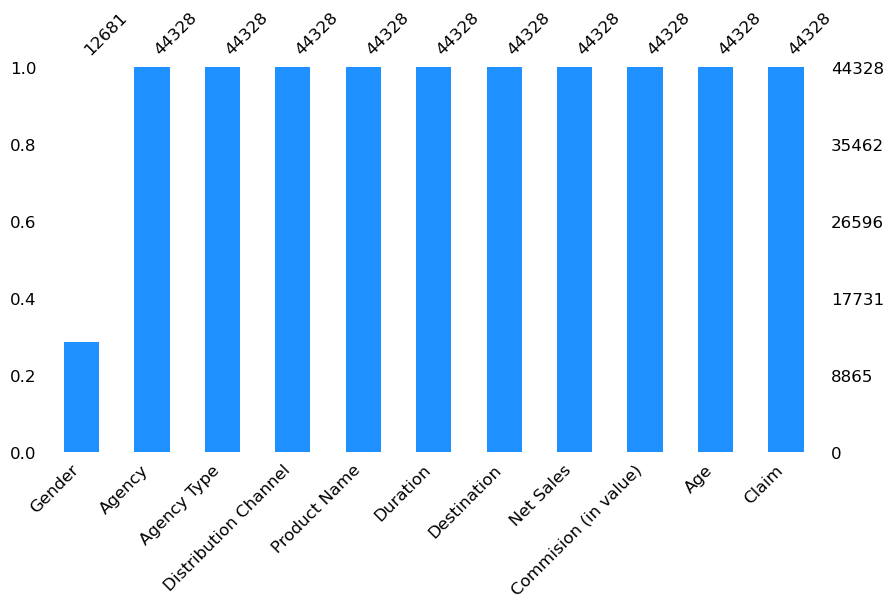

In [97]:
missingno.bar(df,color="dodgerblue", sort="ascending", figsize=(10,5), fontsize=12);

Terlihat dari Bar Plot tersebut hanya kolom gender yang memiliki missing values/data yang hilang. (informasi ini sebenarnya dapat dilihat juga ditable atas)

#### Matrix Plot

<Axes: >

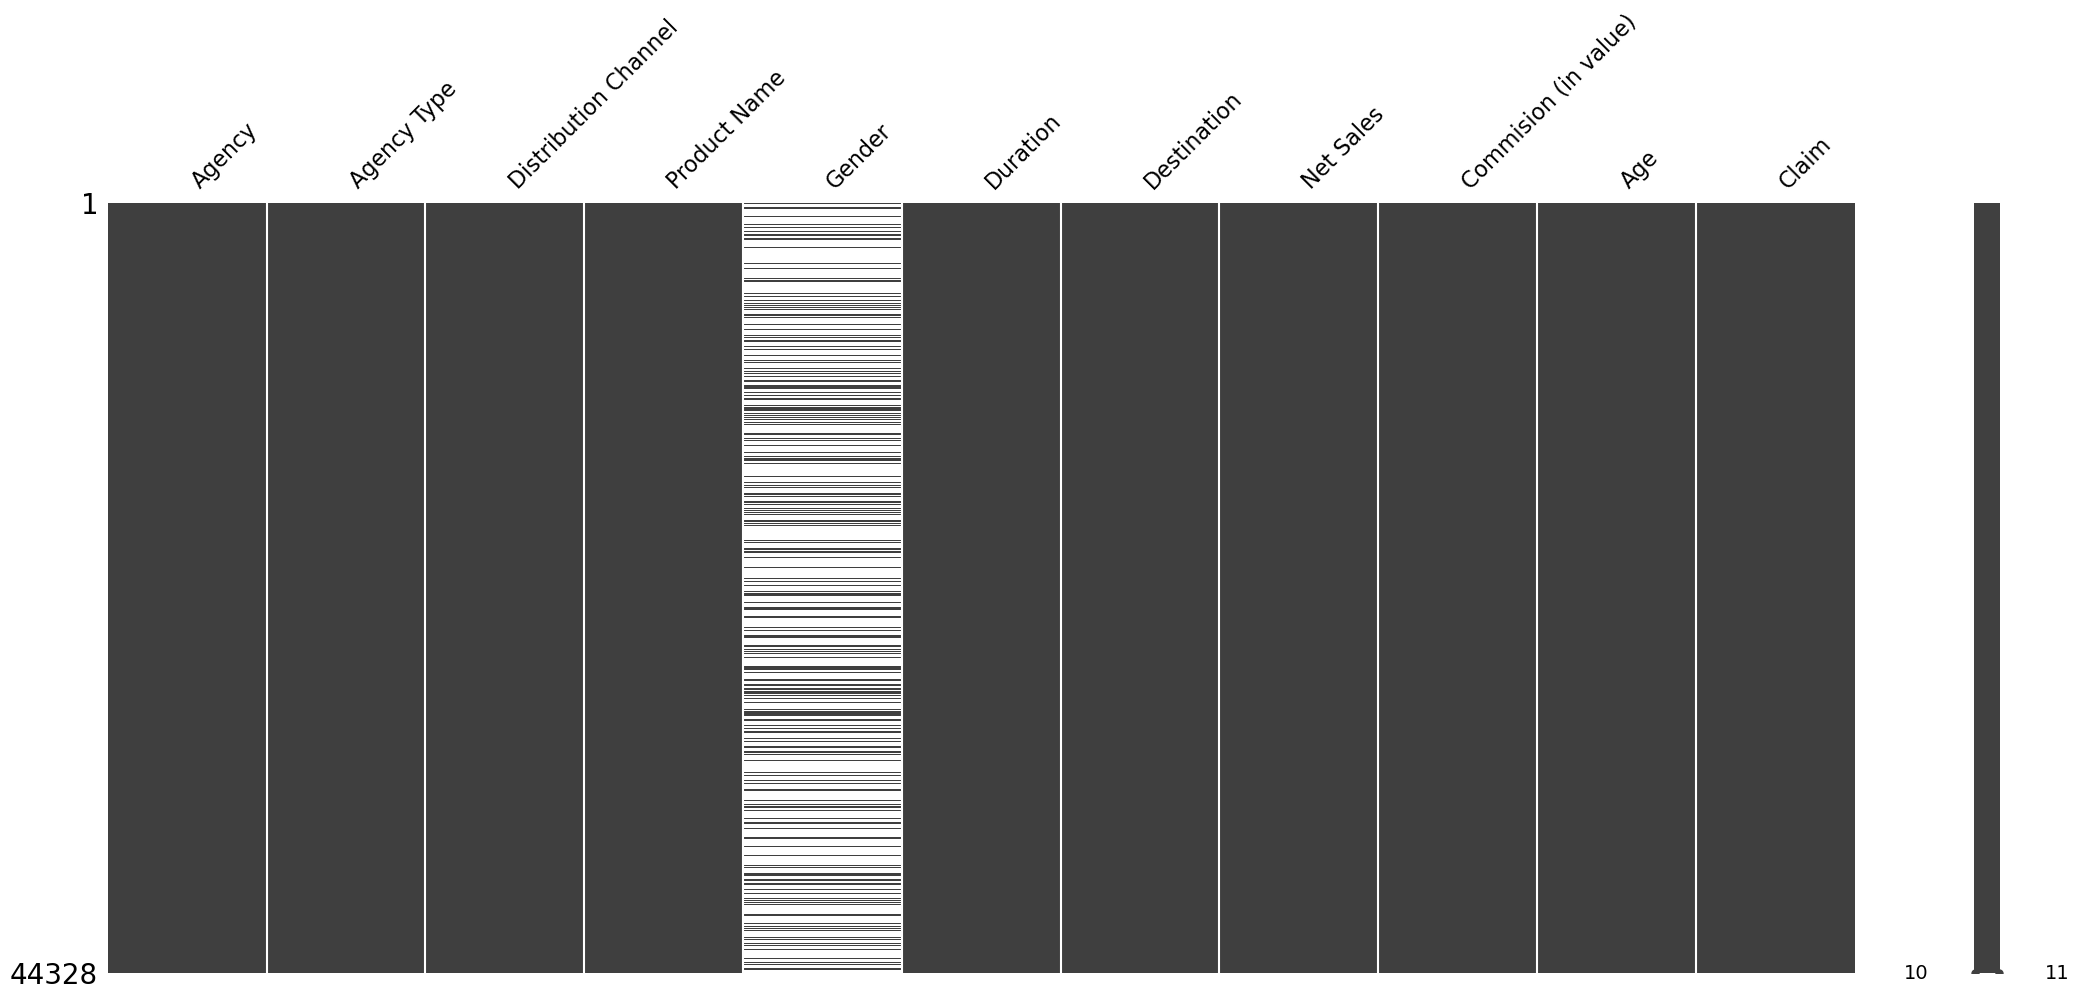

In [98]:
missingno.matrix(df)

Sekarang mari kita coba check & analisa hubungan antara Agency Type dengan Distribution Channel

In [99]:
df.groupby(['Agency Type','Distribution Channel']).count()[['Agency']].transpose()

Agency Type          Airlines        Travel Agency       
Distribution Channel  Offline Online       Offline Online
Agency                     12  12203           744  31369

Terlihat dari info table diatas, bahwa terdapat lebih banyak travel agency daripada airlines yang menjual travel insurance. Dan masing-masing agency ini type ini menggunakan mayoritas hampir seluruhnya menggunakan online distribution channel untuk melakukan penjualan.

#### Airlines

In [100]:
df.groupby(['Agency Type','Product Name']).count()[['Claim']].loc['Airlines'].sort_values(ascending=False,by='Claim')

,Claim
Product Name,
Basic Plan,3834
Bronze Plan,2847
Value Plan,1690
Silver Plan,1552
Annual Silver Plan,975
Ticket Protector,765
Gold Plan,237
24 Protect,172
Annual Gold Plan,142


In [101]:
df.groupby(['Agency Type','Product Name']).count()[['Claim']].loc['Airlines'].sort_values(ascending=False,by='Claim')/df.groupby(['Agency Type','Product Name']).count()[['Claim']].loc['Airlines'].sort_values(ascending=False,by='Claim').sum()*100

,Claim
Product Name,
Basic Plan,31.387638
Bronze Plan,23.307409
Value Plan,13.835448
Silver Plan,12.705690
Annual Silver Plan,7.981989
Ticket Protector,6.262792
Gold Plan,1.940237
24 Protect,1.408105
Annual Gold Plan,1.162505


In [102]:
df.groupby(['Agency Type','Duration']).count()[['Claim']].loc['Airlines'].sort_values(ascending=False,by='Claim')

,Claim
Duration,
5,495
6,489
10,402
7,400
8,388
...,...
275,1
272,1
266,1


In [103]:
df.groupby(['Agency Type','Duration']).count()[['Claim']].loc['Airlines'].sort_values(ascending=False,by='Claim')/df.groupby(['Agency Type','Duration']).count()[['Claim']].loc['Airlines'].sort_values(ascending=False,by='Claim').sum()*100

,Claim
Duration,
5,4.052395
6,4.003275
10,3.291036
7,3.274662
8,3.176422
...,...
275,0.008187
272,0.008187
266,0.008187


In [104]:
df.groupby(['Agency Type','Destination']).count()[['Claim']].loc['Airlines'].sort_values(ascending=False,by='Claim')

,Claim
Destination,
SINGAPORE,6537
CHINA,835
THAILAND,680
INDIA,603
BRUNEI DARUSSALAM,510
...,...
NORWAY,1
PORTUGAL,1
BELGIUM,1


In [105]:
df.groupby(['Agency Type','Destination']).count()[['Claim']].loc['Airlines'].sort_values(ascending=False,by='Claim')/df.groupby(['Agency Type','Destination']).count()[['Claim']].loc['Airlines'].sort_values(ascending=False,by='Claim').sum()*100

,Claim
Destination,
SINGAPORE,53.516169
CHINA,6.835858
THAILAND,5.566926
INDIA,4.936553
BRUNEI DARUSSALAM,4.175194
...,...
NORWAY,0.008187
PORTUGAL,0.008187
BELGIUM,0.008187


Terlihat bahwa kalau untuk travel insurance yang dijual oleh Airlines mayoritas untuk durasi jangka pendek sekitar 1 minggu dan destinasi mayoritas dan paling sering dijual adalah Singapor, lalu produk travel insurance terbanyak dijual adalah basic plan, bronze plan, value plan dan silver plan.

##### Travel Agency

In [106]:
df.groupby(['Agency Type','Product Name']).count()[['Claim']].loc['Travel Agency'].sort_values(ascending=False,by='Claim')

,Claim
Product Name,
Cancellation Plan,12979
2 way Comprehensive Plan,9341
Rental Vehicle Excess Insurance,5980
1 way Comprehensive Plan,2336
Travel Cruise Protect,353
Comprehensive Plan,253
Value Plan,217
Single Trip Travel Protect Gold,135
Premier Plan,129


In [107]:
df.groupby(['Agency Type','Product Name']).count()[['Claim']].loc['Travel Agency'].sort_values(ascending=False,by='Claim')/df.groupby(['Agency Type','Product Name']).count()[['Claim']].loc['Travel Agency'].sort_values(ascending=False,by='Claim').sum()*100

,Claim
Product Name,
Cancellation Plan,40.416654
2 way Comprehensive Plan,29.087908
Rental Vehicle Excess Insurance,18.621742
1 way Comprehensive Plan,7.274313
Travel Cruise Protect,1.099243
Comprehensive Plan,0.787843
Value Plan,0.675739
Single Trip Travel Protect Gold,0.420390
Premier Plan,0.401706


In [108]:
df.groupby(['Agency Type','Duration']).count()[['Claim']].loc['Travel Agency'].sort_values(ascending=False,by='Claim')

,Claim
Duration,
6,1026
7,986
8,981
5,968
4,952
...,...
387,1
389,1
395,1


In [109]:
df.groupby(['Agency Type','Duration']).count()[['Claim']].loc['Travel Agency'].sort_values(ascending=False,by='Claim')/df.groupby(['Agency Type','Duration']).count()[['Claim']].loc['Travel Agency'].sort_values(ascending=False,by='Claim').sum()*100

,Claim
Duration,
6,3.194968
7,3.070408
8,3.054838
5,3.014356
4,2.964531
...,...
387,0.003114
389,0.003114
395,0.003114


In [110]:
df.groupby(['Agency Type','Destination']).count()[['Claim']].loc['Travel Agency'].sort_values(ascending=False,by='Claim')

,Claim
Destination,
MALAYSIA,3684
THAILAND,3442
SINGAPORE,2730
CHINA,2561
AUSTRALIA,2437
...,...
RWANDA,1
NIGERIA,1
REUNION,1


In [111]:
df.groupby(['Agency Type','Destination']).count()[['Claim']].loc['Travel Agency'].sort_values(ascending=False,by='Claim')/df.groupby(['Agency Type','Destination']).count()[['Claim']].loc['Travel Agency'].sort_values(ascending=False,by='Claim').sum()*100

,Claim
Destination,
MALAYSIA,11.471990
THAILAND,10.718401
SINGAPORE,8.501230
CHINA,7.974963
AUSTRALIA,7.588827
...,...
RWANDA,0.003114
NIGERIA,0.003114
REUNION,0.003114


Terlihat bahwa kalau untuk travel insurance yang dijual oleh Travel Agency mayoritas untuk durasi jangka pendek sekitar 1 minggu dan destinasi mayoritas dan paling sering dijual adalah Malaysia, Thailand, Singapore, China dan Australia, lalu produk travel insurance terbanyak dijual adalah cancellation plan, 2 way comprehensive plan , rental vehicle excess insurance dan 1 way comprehensive plan. 

#### Remove Unused Data

Sekarang, mari kita hapus kolom gender dari dataset kita, dimana alasan kolom gender dihapus adalah untuk supaya analisa yang kita lakukan dan juga model ML yang nanti kita akan buat, tidak melakukan diskriminasi terhadap gender. Lalu, teringat juga di kolom gender mayoritas adalah kosong sehingga tidak akan meaningful jika kita paksakan. 

Dimana semestinya, gender tidak mempengaruhi/membedakan kemungkinan suatu pembeli polis untuk melakukan claim. (ini hanya asumsi saya saja berdasarkan pengalaman dan pengetahuan saya, boleh saja anda buktikan kembali sendiri)

In [112]:
df.drop(['Gender'],axis=1, inplace=True)

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44328 entries, 0 to 44327
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                44328 non-null  object 
 1   Agency Type           44328 non-null  object 
 2   Distribution Channel  44328 non-null  object 
 3   Product Name          44328 non-null  object 
 4   Duration              44328 non-null  int64  
 5   Destination           44328 non-null  object 
 6   Net Sales             44328 non-null  float64
 7   Commision (in value)  44328 non-null  float64
 8   Age                   44328 non-null  int64  
 9   Claim                 44328 non-null  int32  
dtypes: float64(2), int32(1), int64(2), object(5)
memory usage: 3.2+ MB


Setelah kita menghapus kolom gender, kita akan menghapus semua baris data yang memiliki missing values/data, tetapi sebelum itu, mari kita lihat dulu distribusi data dari setiap fiturnya, dimana akan kita bandingkan juga dengan distribusi dari data kita yang  sudah dihapus baris data yang memiliki data yg kosong/hilang. Dimana tujuannya supaya memastikan data yg kita miliki setelah dihapus baris2 yg memiliki missing data, masih memiliki distribusi yang kurang lebih sama seperti sebelumnya.

##### Numerical Features Distribution

In [114]:
df.describe()

,Duration,Net Sales,Commision (in value),Age,Claim
count,44328.000000,44328.000000,44328.000000,44328.000000,44328.000000
mean,49.424292,40.550948,9.707692,39.925600,0.015273
std,109.153961,48.661970,19.625637,13.954926,0.122636
min,-1.000000,-357.500000,0.000000,0.000000,0.000000
25%,9.000000,18.000000,0.000000,35.000000,0.000000
50%,22.000000,26.500000,0.000000,36.000000,0.000000
75%,53.000000,48.000000,11.550000,43.000000,0.000000
max,4881.000000,810.000000,283.500000,118.000000,1.000000


In [115]:
df.dropna().describe()

,Duration,Net Sales,Commision (in value),Age,Claim
count,44328.000000,44328.000000,44328.000000,44328.000000,44328.000000
mean,49.424292,40.550948,9.707692,39.925600,0.015273
std,109.153961,48.661970,19.625637,13.954926,0.122636
min,-1.000000,-357.500000,0.000000,0.000000,0.000000
25%,9.000000,18.000000,0.000000,35.000000,0.000000
50%,22.000000,26.500000,0.000000,36.000000,0.000000
75%,53.000000,48.000000,11.550000,43.000000,0.000000
max,4881.000000,810.000000,283.500000,118.000000,1.000000


Seperti yang kita lihat distribusi data dari kolom/fitur numerik yang kita punya sama persis setelah data yang kosong/hilang dihapus, karena tidak ada data missing lagi selain di kolom gender.

Mari kita check perubahan distribusi data dari kolom target kita dengan lebih detail.

In [116]:
df['Claim'].value_counts()

Claim
0    43651
1      677
Name: count, dtype: int64

In [117]:
df.dropna()['Claim'].value_counts()

Claim
0    43651
1      677
Name: count, dtype: int64

In [118]:
df['Claim'].value_counts()/len(df['Claim']) * 100

Claim
0    98.472749
1     1.527251
Name: count, dtype: float64

In [119]:
df.dropna()['Claim'].value_counts()/len(df.dropna()['Claim']) * 100

Claim
0    98.472749
1     1.527251
Name: count, dtype: float64

Terlihat bahwa distribusi kolom Claim kita sama persis seperti sebelum data yang kosong dihapus.

Mari sekarang kita check juga distribusi data kolom categorical kita

##### Categorical Features Distribution

In [120]:
df.describe(include=['O'])

,Agency,Agency Type,Distribution Channel,Product Name,Destination
count,44328,44328,44328,44328,44328
unique,16,2,2,26,138
top,EPX,Travel Agency,Online,Cancellation Plan,SINGAPORE
freq,24656,32113,43572,12979,9267


In [121]:
df.dropna().describe(include=['O'])

,Agency,Agency Type,Distribution Channel,Product Name,Destination
count,44328,44328,44328,44328,44328
unique,16,2,2,26,138
top,EPX,Travel Agency,Online,Cancellation Plan,SINGAPORE
freq,24656,32113,43572,12979,9267


#### Remove Outliers

diatas tadi, kita berhasil menyimpulkan bahwa data-data yang dimana net sales adalah negative bisa kita putuskan untuk kita delete agar tidak diikutsertakan dalam analisa karena mereka pada umumnya adalah refund atau error mungkin. Lalu, Kita juga mengingat bahwa Duration ada yang negative dan age ada yang diatas 100. Kita akan drop data-data tersebut.

In [122]:
df_cleaned = df[(df['Net Sales'] >= 0) & (df['Duration']>=0) & (df['Age'] <= 100)]
df_cleaned

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,365,SINGAPORE,216.0,54.00,57,0
1,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,10.0,0.00,33,0
2,JZI,Airlines,Online,Basic Plan,19,INDIA,22.0,7.70,26,0
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,20,UNITED STATES,112.0,0.00,59,0
4,C2B,Airlines,Online,Bronze Plan,8,SINGAPORE,16.0,4.00,28,0
...,...,...,...,...,...,...,...,...,...,...
44323,EPX,Travel Agency,Online,2 way Comprehensive Plan,14,CHINA,30.0,0.00,36,1
44324,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,17,AUSTRALIA,79.2,47.52,47,0
44325,TST,Travel Agency,Offline,Travel Cruise Protect,64,THAILAND,30.0,10.50,50,0
44326,EPX,Travel Agency,Online,2 way Comprehensive Plan,51,CHINA,36.0,0.00,36,0


In [123]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43178 entries, 0 to 44327
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                43178 non-null  object 
 1   Agency Type           43178 non-null  object 
 2   Distribution Channel  43178 non-null  object 
 3   Product Name          43178 non-null  object 
 4   Duration              43178 non-null  int64  
 5   Destination           43178 non-null  object 
 6   Net Sales             43178 non-null  float64
 7   Commision (in value)  43178 non-null  float64
 8   Age                   43178 non-null  int64  
 9   Claim                 43178 non-null  int32  
dtypes: float64(2), int32(1), int64(2), object(5)
memory usage: 3.5+ MB


In [124]:
listItem = []
for col in df_cleaned.columns :
    listItem.append([col, df_cleaned[col].dtype, df_cleaned[col].isna().sum(), round((df_cleaned[col].isna().sum()/len(df_cleaned[col])) * 100,2),
                    df_cleaned[col].nunique(), list(df_cleaned[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Agency,object,0,0.0,15,"[ADM, CWT]"
1,Agency Type,object,0,0.0,2,"[Travel Agency, Airlines]"
2,Distribution Channel,object,0,0.0,2,"[Online, Offline]"
3,Product Name,object,0,0.0,26,"[Cancellation Plan, Individual Comprehensive P..."
4,Duration,int64,0,0.0,435,"[254, 391]"
5,Destination,object,0,0.0,136,"[VENEZUELA, SOUTH AFRICA]"
6,Net Sales,float64,0,0.0,871,"[43.5, 57.24]"
7,Commision (in value),float64,0,0.0,885,"[0.86, 1.08]"
8,Age,int64,0,0.0,88,"[39, 3]"
9,Claim,int32,0,0.0,2,"[0, 1]"


ok sekarang data yang kita miliki sudah bersih, mari sekarang kita lanjut ke tahap Analisa Datanya untuk keperluan masalah kita.

## Data Analysis

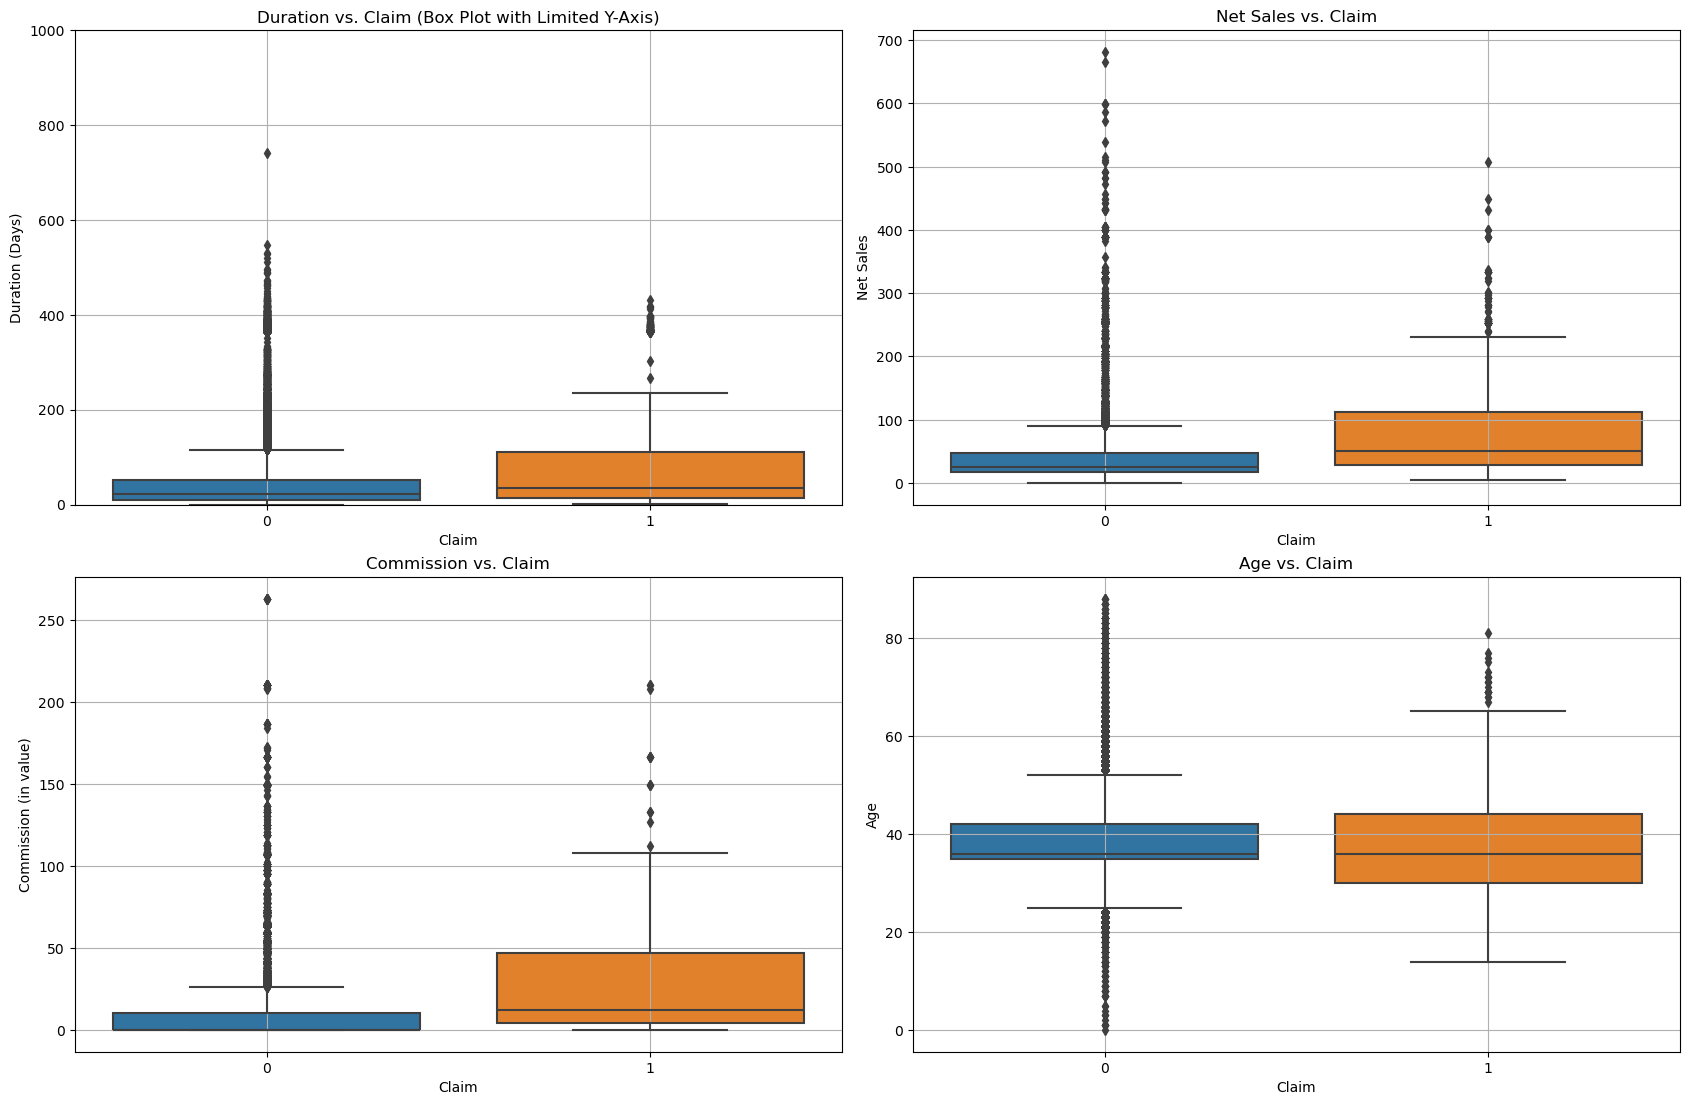

In [125]:
plt.figure(figsize=(17,12))

plt.subplot(221)
sns.boxplot(data=df_cleaned, y='Duration', x='Claim')
plt.ylim(0, 1000)
plt.title('Duration vs. Claim (Box Plot with Limited Y-Axis)')
plt.xlabel('Claim')
plt.ylabel('Duration (Days)')
plt.grid(True)

plt.subplot(222)
sns.boxplot(data=df_cleaned, y='Net Sales', x='Claim')
plt.title('Net Sales vs. Claim')
plt.xlabel('Claim')
plt.ylabel('Net Sales')
plt.grid(True)

plt.subplot(223)
sns.boxplot(data=df_cleaned, y='Commision (in value)', x='Claim')
plt.title('Commission vs. Claim')
plt.xlabel('Claim')
plt.ylabel('Commission (in value)')
plt.grid(True)

plt.subplot(224)
sns.boxplot(data=df_cleaned, y='Age', x='Claim')
plt.title('Age vs. Claim')
plt.xlabel('Claim')
plt.ylabel('Age')
plt.grid(True)

# Adjust the layout
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

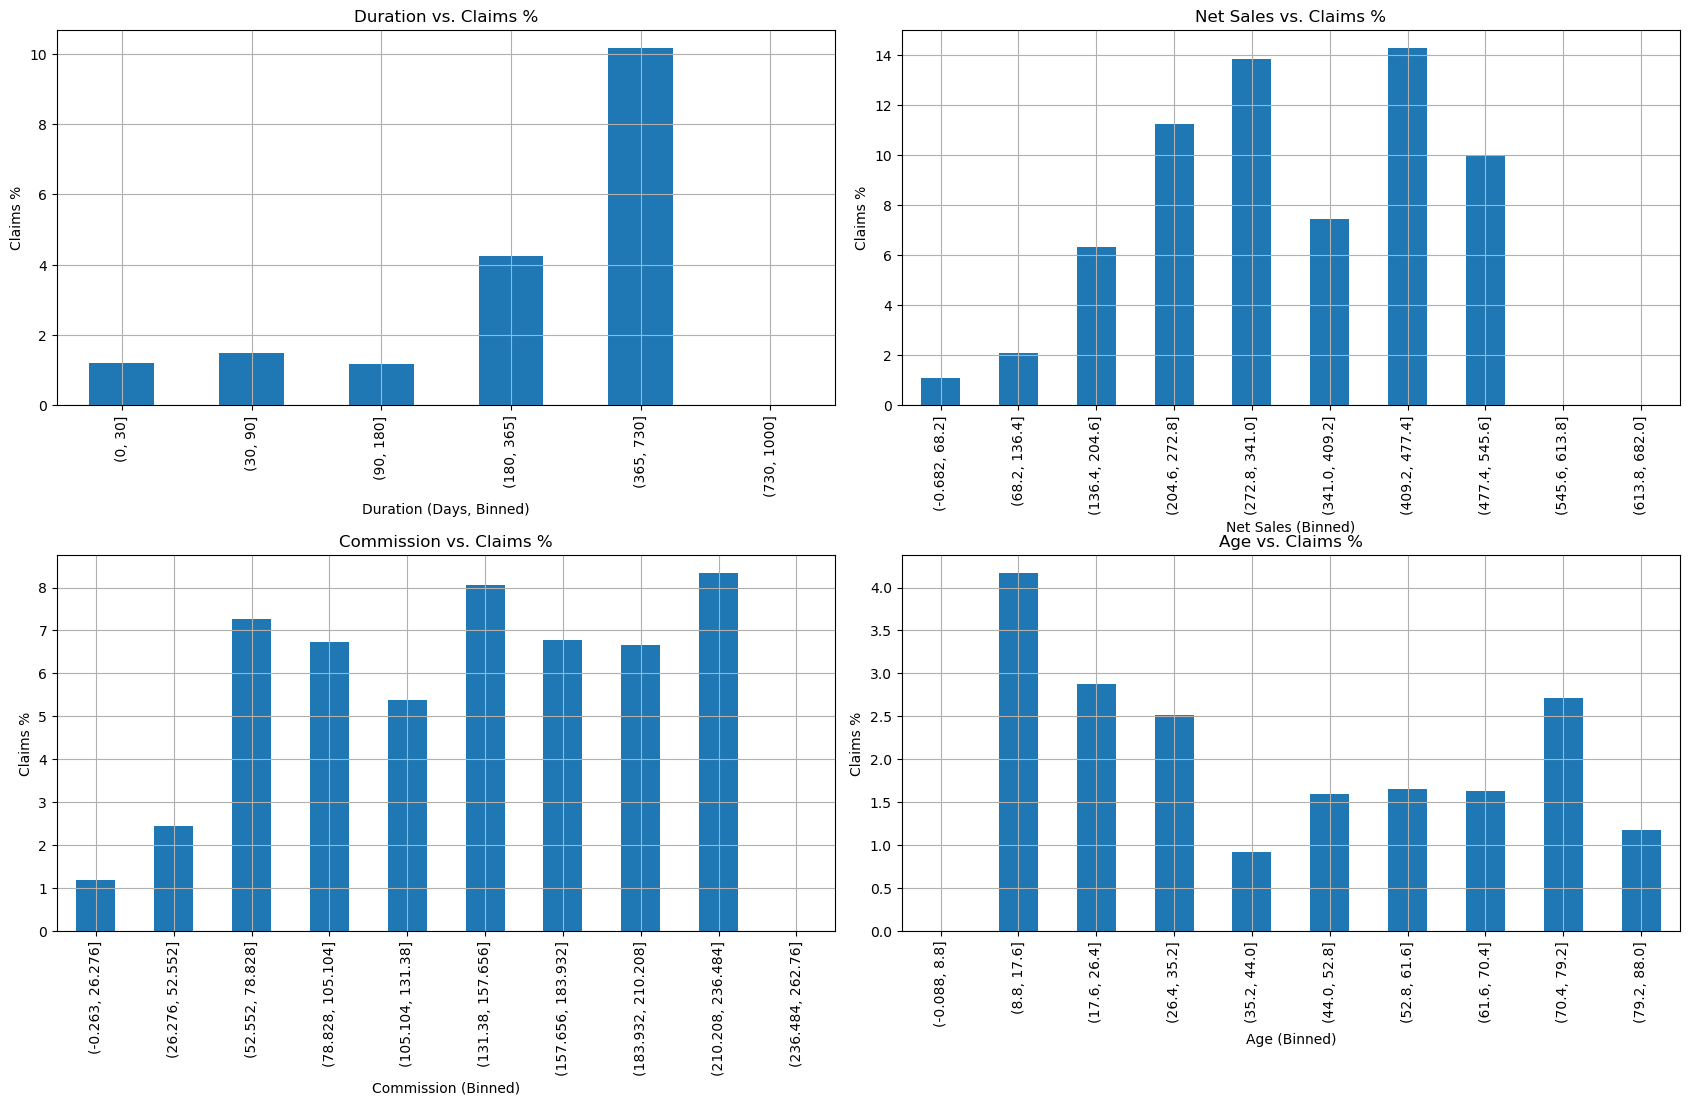

In [161]:
# Function to calculate percentage of claims
def calculate_percentage_of_claims(df, feature):
    percentage_claims = df.groupby(feature)['Claim'].mean() * 100
    return percentage_claims

# Create a figure
plt.figure(figsize=(17,12))

# Duration vs. Claims % with Custom Bins
plt.subplot(221)
# Manually specify bin edges for Duration
duration_bins = pd.cut(df_cleaned['Duration'], bins=[0, 30, 90, 180, 365, 730, 1000])
duration_percentage = calculate_percentage_of_claims(df_cleaned.assign(Duration_Binned=duration_bins), 'Duration_Binned')
duration_percentage.plot(kind='bar')
plt.title('Duration vs. Claims %')
plt.xlabel('Duration (Days, Binned)')
plt.ylabel('Claims %')
plt.grid(True)

# Net Sales vs. Claims %
plt.subplot(222)
net_sales_bins = pd.cut(df_cleaned['Net Sales'], bins=10)
net_sales_percentage = calculate_percentage_of_claims(df_cleaned.assign(Net_Sales_Binned=net_sales_bins), 'Net_Sales_Binned')
net_sales_percentage.plot(kind='bar')
plt.title('Net Sales vs. Claims %')
plt.xlabel('Net Sales (Binned)')
plt.ylabel('Claims %')
plt.grid(True)

# Commission vs. Claims %
plt.subplot(223)
commission_bins = pd.cut(df_cleaned['Commision (in value)'], bins=10)
commission_percentage = calculate_percentage_of_claims(df_cleaned.assign(Commission_Binned=commission_bins), 'Commission_Binned')
commission_percentage.plot(kind='bar')
plt.title('Commission vs. Claims %')
plt.xlabel('Commission (Binned)')
plt.ylabel('Claims %')
plt.grid(True)

# Age vs. Claims %
plt.subplot(224)
age_bins = pd.cut(df_cleaned['Age'], bins=10)
age_percentage = calculate_percentage_of_claims(df_cleaned.assign(Age_Binned=age_bins), 'Age_Binned')
age_percentage.plot(kind='bar')
plt.title('Age vs. Claims %')
plt.xlabel('Age (Binned)')
plt.ylabel('Claims %')
plt.grid(True)

# Adjust the layout
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

Berdasarkan histogram dan boxplot diatas, kita dapat menyimpulkan bahwa terlihat perbedaan distribusi `Duration`, `Net Sales` dan `Commision` dari target yang 0 (tidak Claim) dan target yang 1 (yang Claim), dimana yang Claim biasa `Duration`,`Net Sales` dan `Commision`-nya lebih tinggi dari yang tidak Claim. Sedangkan kalau distribusi `Age` kurang lebih sedikit mirip antara target 0 dan 1. Hanya saja, dsitribusi yang 1 (Claim) itu lebih luas dibanding 0 (tidak Claim). 

Lalu, kita juga bisa lihat melalui barchart trend claims %, bahwa `durasi`, `Net sales`, dan `Commission` berbanding lurus dengan claims%. Generally, semakin besar features ini, semakin besar juga claims%. Sedangkan, trend-nya tidak terlalu kelihatan untuk feature `age`.

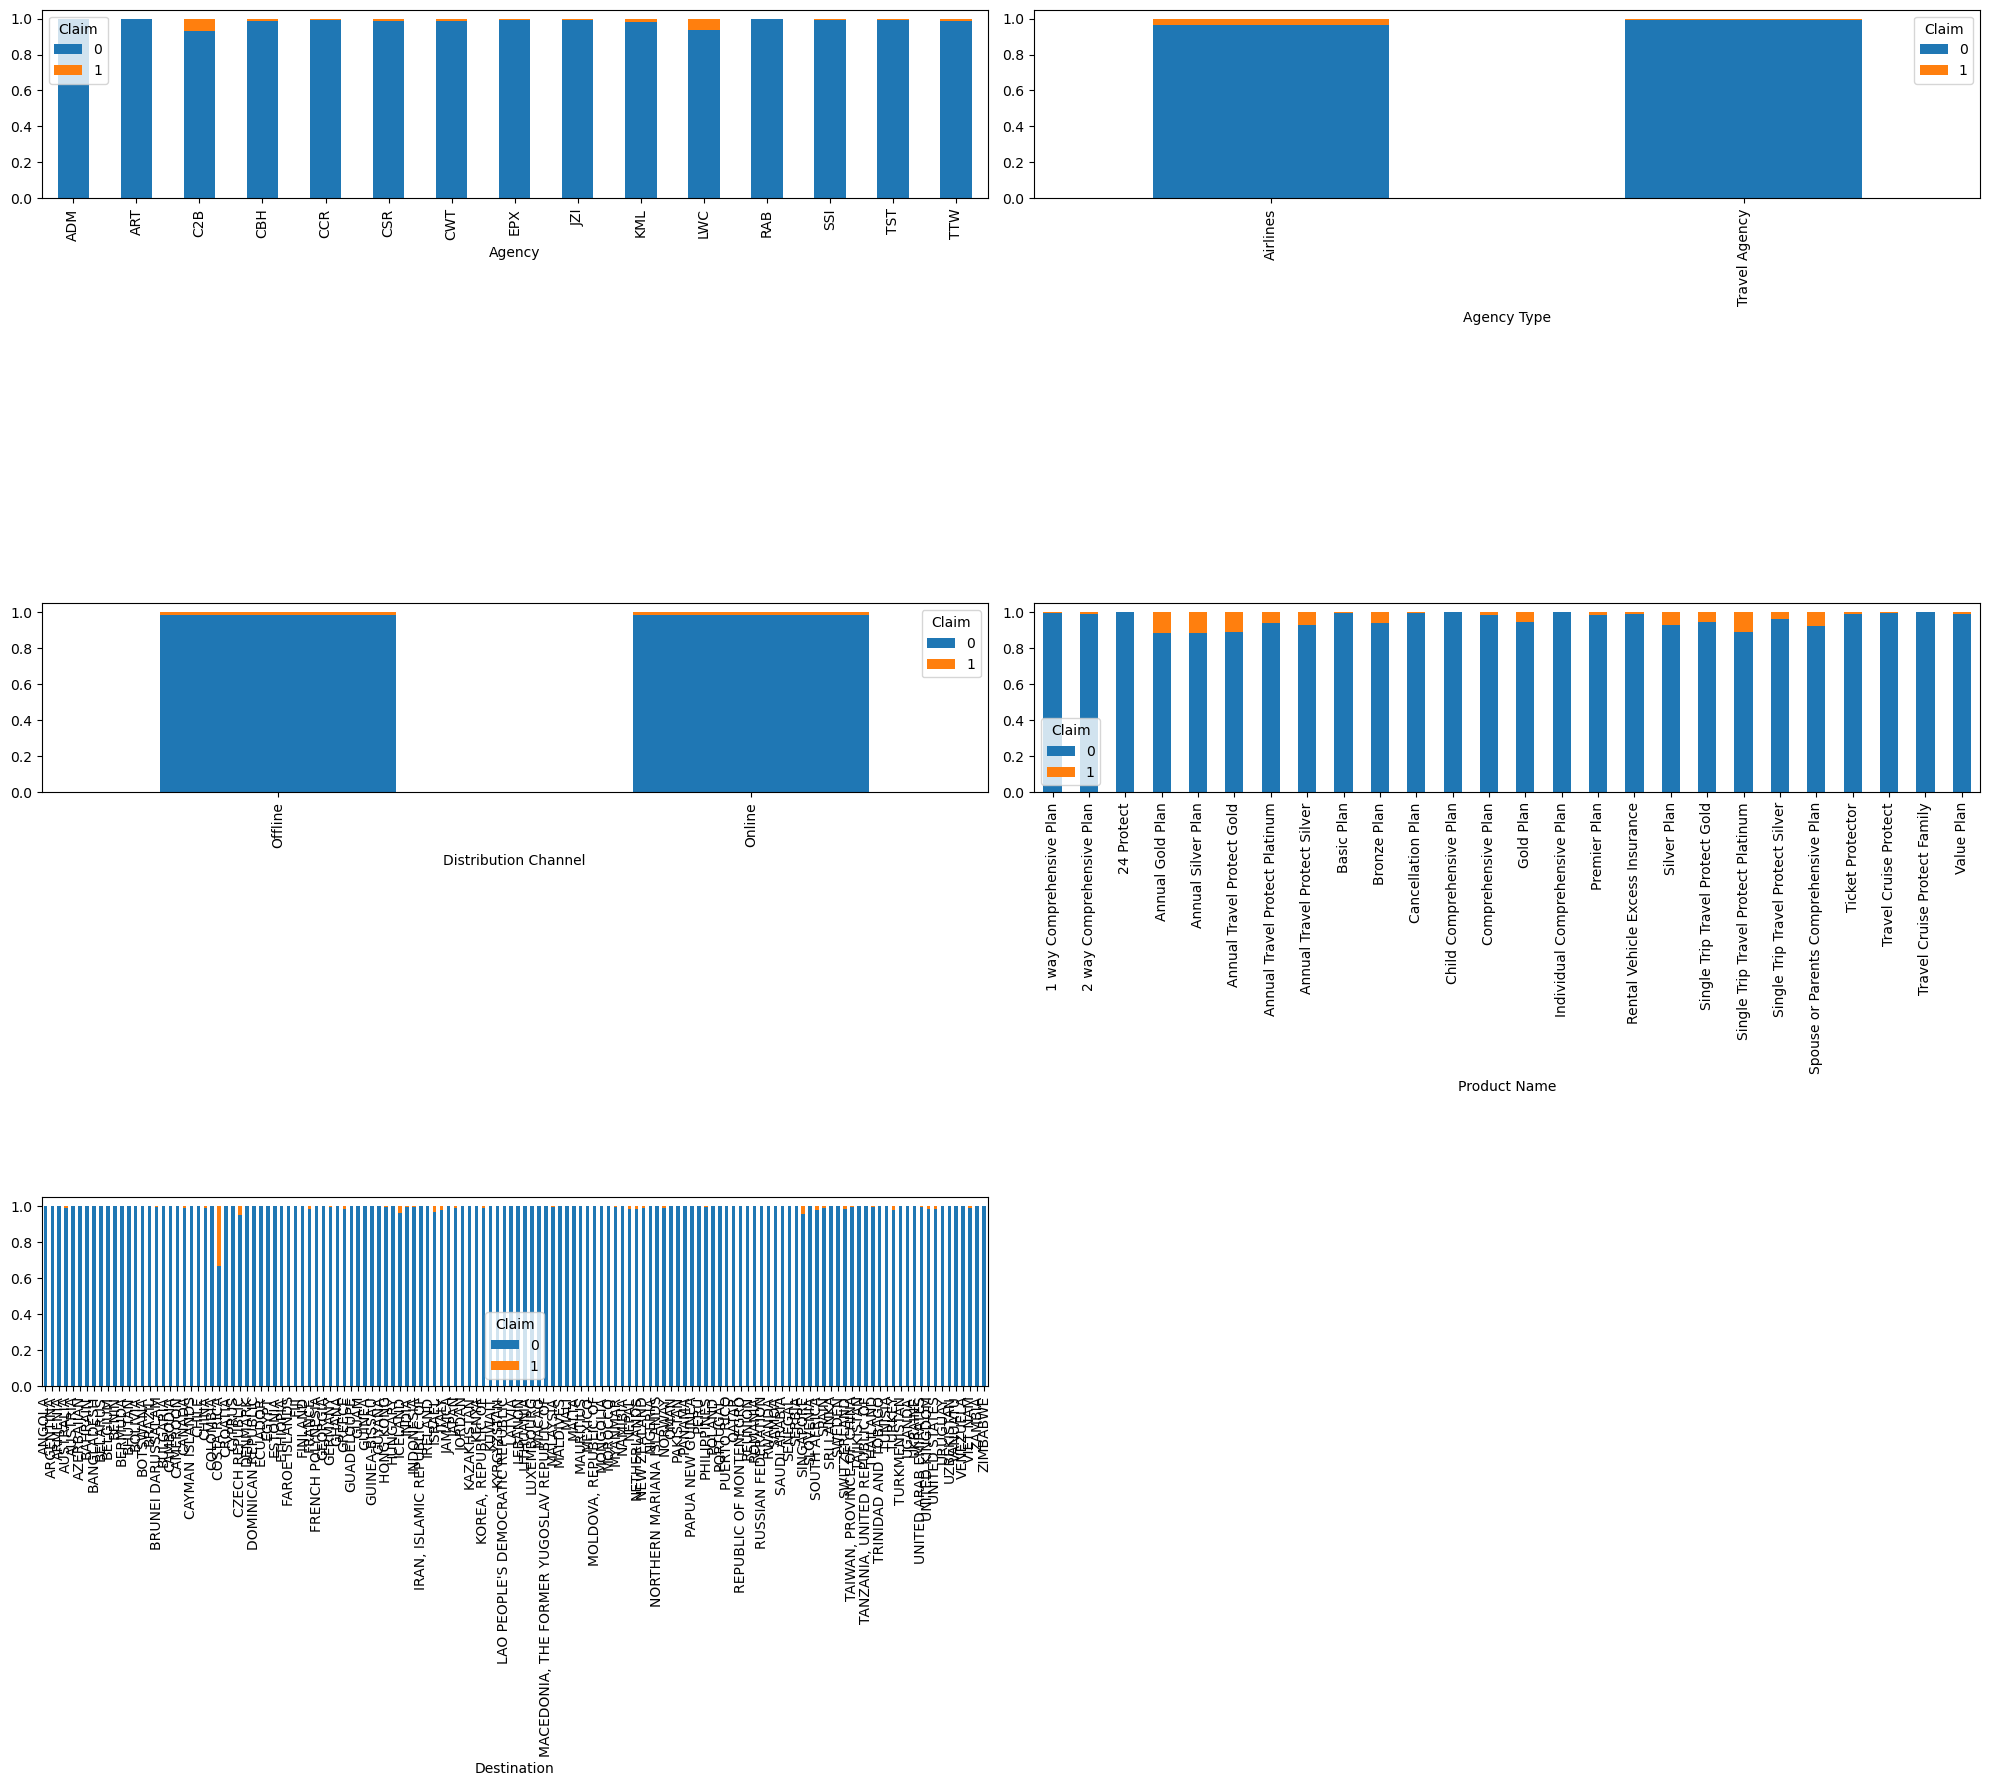

In [126]:
count = 0
fig = plt.figure(figsize=(20,20))

for i in df_cleaned.drop(columns=['Duration','Net Sales','Commision (in value)','Age','Claim']).columns:
    count +=1
    ax= plt.subplot(4,2,count)
    pd.crosstab(df_cleaned[i],df_cleaned['Claim'],normalize=0).plot(kind='bar',stacked=True,ax=ax)
    fig.tight_layout()

plt.show()

In [157]:
for i in df_cleaned.drop(columns=['Net Sales','Commision (in value)','Claim']).columns:
    filter_df_cleaned = df_cleaned.groupby(i)['Claim'].value_counts(normalize=True).unstack()
    display(filter_df_cleaned.sort_values(by=[1.0], ascending=False))

Claim,0,1
Agency,,
C2B,0.928896,0.071104
LWC,0.935698,0.064302
KML,0.982143,0.017857
CSR,0.985294,0.014706
CBH,0.985507,0.014493
TTW,0.985507,0.014493
CWT,0.988792,0.011208
CCR,0.989796,0.010204
SSI,0.993377,0.006623


Claim,0,1
Agency Type,,
Airlines,0.962331,0.037669
Travel Agency,0.992570,0.007430


Claim,0,1
Product Name,,
Annual Gold Plan,0.886525,0.113475
Annual Silver Plan,0.887164,0.112836
Annual Travel Protect Gold,0.888889,0.111111
Single Trip Travel Protect Platinum,0.893617,0.106383
Spouse or Parents Comprehensive Plan,0.923077,0.076923
Silver Plan,0.930097,0.069903
Annual Travel Protect Silver,0.932203,0.067797
Annual Travel Protect Platinum,0.941176,0.058824
Bronze Plan,0.942897,0.057103


Claim,0,1
Duration,,
398,0.333333,0.666667
413,0.666667,0.333333
394,0.666667,0.333333
396,0.666667,0.333333
419,0.750000,0.250000
...,...,...
4831,1.000000,NaN
4844,1.000000,NaN
4847,1.000000,NaN


Claim,0,1
Destination,,
COSTA RICA,0.666667,0.333333
CZECH REPUBLIC,0.953488,0.046512
SINGAPORE,0.954699,0.045301
ICELAND,0.959459,0.040541
ISRAEL,0.968750,0.031250
...,...,...
UZBEKISTAN,1.000000,NaN
VANUATU,1.000000,NaN
VENEZUELA,1.000000,NaN


Claim,0,1
Age,,
17,0.866667,0.133333
14,0.923077,0.076923
81,0.941176,0.058824
77,0.947368,0.052632
69,0.953846,0.046154
...,...,...
84,1.000000,NaN
85,1.000000,NaN
86,1.000000,NaN


In [128]:
# Calculate the total number of claims and total records for each destination
claims_by_destination = df_cleaned.groupby('Destination')['Claim'].agg(['sum', 'count'])

# Calculate the proportion of claims
claims_by_destination['Proportion'] = claims_by_destination['sum'] / claims_by_destination['count']

# Identify the destination with the highest proportion of claims
highest_proportion_destination = claims_by_destination['Proportion'].idxmax()
highest_proportion_value = claims_by_destination['Proportion'].max()
claims_by_destination_sorted = claims_by_destination.sort_values(by='Proportion', ascending=False)

print(claims_by_destination_sorted.head(10))
print(f"The destination with the highest proportion of claims is {highest_proportion_destination} with a proportion of {highest_proportion_value:.2f}.")

                sum  count  Proportion
Destination                           
COSTA RICA        1      3    0.333333
CZECH REPUBLIC    2     43    0.046512
SINGAPORE       417   9205    0.045301
ICELAND           3     74    0.040541
ISRAEL            1     32    0.031250
ITALY             6    303    0.019802
SOUTH AFRICA      2    106    0.018868
TURKEY            1     54    0.018519
FRANCE            6    328    0.018293
UNITED STATES    29   1707    0.016989
The destination with the highest proportion of claims is COSTA RICA with a proportion of 0.33.


Berdasarkan barplot dan table diatas kita dapat menyimpulkan beberapa hal :
1. Pelanggan yang membeli travel insurance dari agency `C2B` dan `LWC` cenderung lebih memungkinkan untuk melakukan claim dibanding pembelian melalui agency lainnya
2. Agency Type `Airlines` lebih memiliki proporsi tinggi dalam jumlah pembeli yang melakukan Claim dibandingkan dengan Agency Type `Travel Agency`
3. Distribution Channel `Online` dan `Offline` kurang lebih memiliki proporsi yang melakukan Claim yang sama.
4. `Annual Gold Plan`, `Annual Silver Plan`, `Annual Travel Protect Gold`, `Annual Travel Protect Platinum`, `Annual Travel Protect Silver`,`Single Trip Travel Protect Platinum`, `Gold Plan`, `Silver Plan`, `Single Trip Travel Gold`, `Single Trip Travel Platinum`, `Single Trip Silver`, and `Spouse or Parents Comprehensive Plan` memiliki proporsi claims yang cenderung tinggi dibanding produk-produk lainnya. Kemungkinan produk-produk ini yang proporsi claim lumayan tinggi adalah produk-produk yang termasuk lebih mahal atau premium sehingga mungkin mengcover event-event yang sering terjadi yang tidak dicover basic atau value plans.
5. Proporsi paling tinggi untuk claims adalah `Costa Rica`, tapi ini mungkin bisa jadi karena jumlah penjualan polis masih terlalu kecil sehingga belum mengikuti law of large number.

In [129]:
listItem = []
for col in df_cleaned.columns :
    listItem.append([col, df_cleaned[col].dtype, df_cleaned[col].isna().sum(), round((df_cleaned[col].isna().sum()/len(df_cleaned[col])) * 100,2),
                    df_cleaned[col].nunique(), list(df_cleaned[col].drop_duplicates().sample(2).values)]);

df_cleanedDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
df_cleanedDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Agency,object,0,0.0,15,"[ART, CWT]"
1,Agency Type,object,0,0.0,2,"[Airlines, Travel Agency]"
2,Distribution Channel,object,0,0.0,2,"[Online, Offline]"
3,Product Name,object,0,0.0,26,"[Rental Vehicle Excess Insurance, Travel Cruis..."
4,Duration,int64,0,0.0,435,"[227, 182]"
5,Destination,object,0,0.0,136,"[UKRAINE, LAO PEOPLE'S DEMOCRATIC REPUBLIC]"
6,Net Sales,float64,0,0.0,871,"[23.47, 2.19]"
7,Commision (in value),float64,0,0.0,885,"[66.25, 38.0]"
8,Age,int64,0,0.0,88,"[54, 53]"
9,Claim,int32,0,0.0,2,"[1, 0]"


#### Chi Square Test and Correlation Test

In [130]:
# Feature Selection (Categorical) Chi Square Test

hasil = []

for i in df_cleaned.select_dtypes(include=['object']):
    contingency_table = pd.crosstab(df_cleaned[i],df_cleaned['Claim'])
    stat, pval, df, expected_freq = chi2_contingency(contingency_table)
    berpengaruh = pval < 0.05
    hasil.append([i,stat,pval,berpengaruh])

pd.DataFrame(hasil, columns=['Feature','Chi Square Stats','P-Value','Berpengaruh?'])

,Feature,Chi Square Stats,P-Value,Berpengaruh?
0,Agency,1448.389000,6.190587e-301,True
1,Agency Type,504.387546,1.055206e-111,True
2,Distribution Channel,0.446040,5.042217e-01,False
3,Product Name,1665.018614,0.000000e+00,True
4,Destination,758.445991,1.727354e-87,True


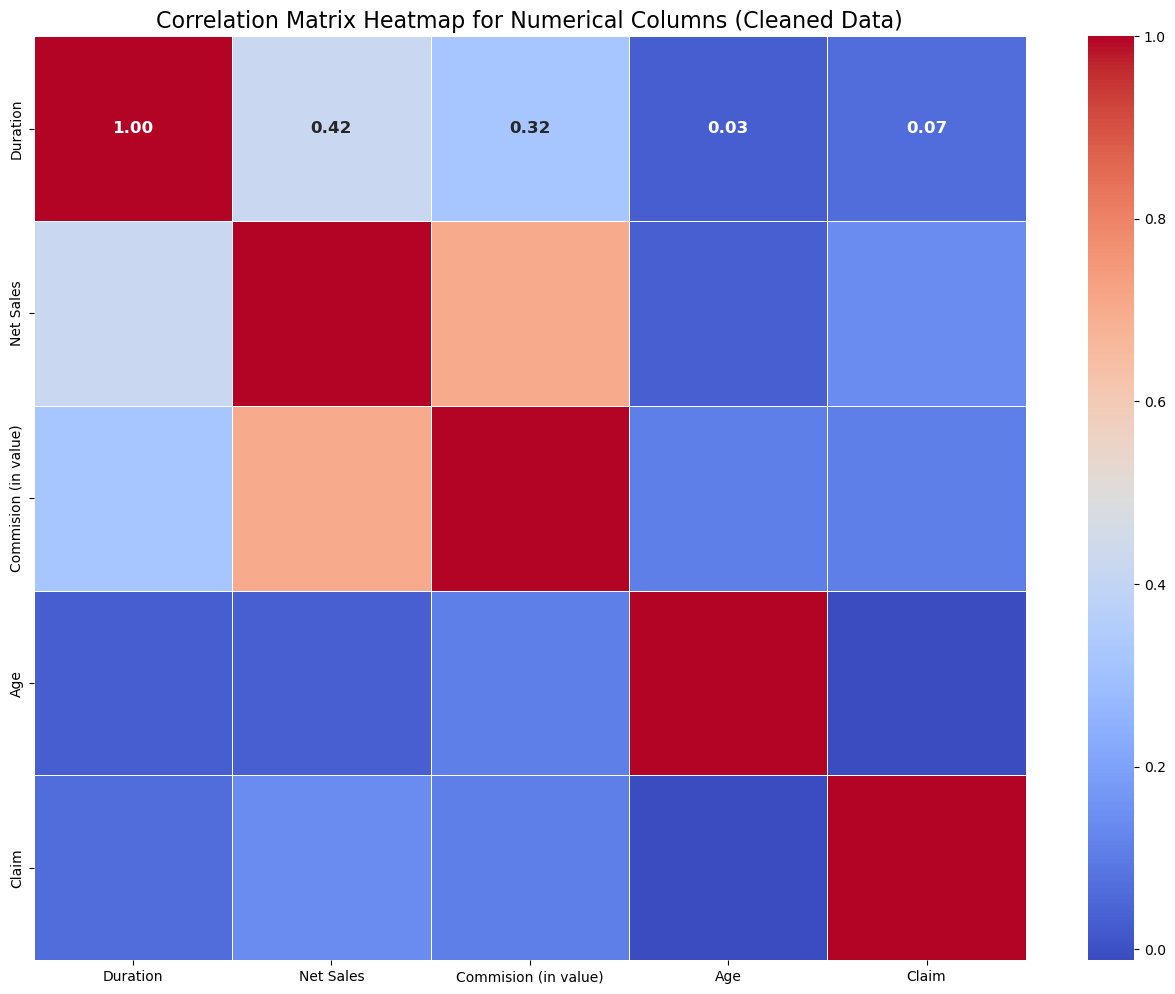

In [131]:
# Select only the numerical columns (int32, int64, and float64)
numerical_df_cleaned = df_cleaned.select_dtypes(include=['int32', 'int64', 'float64'])

# Compute the correlation matrix
corr_matrix = numerical_df_cleaned.corr()

# Plot the heatmap with adjusted settings
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5, annot_kws={"size": 12, "weight": "bold"})
plt.title('Correlation Matrix Heatmap for Numerical Columns (Cleaned Data)', size=16)
plt.show()

Dari analisa dan uji korelasi, kita bisa simpulkan bahwa Kolom distribusi channel bisa kita drop karena tidak berdampak pada Claims.

In [132]:
df_cleaned.drop('Distribution Channel',axis=1,inplace=True)
df_cleaned

,Agency,Agency Type,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Annual Silver Plan,365,SINGAPORE,216.0,54.00,57,0
1,EPX,Travel Agency,Cancellation Plan,4,MALAYSIA,10.0,0.00,33,0
2,JZI,Airlines,Basic Plan,19,INDIA,22.0,7.70,26,0
3,EPX,Travel Agency,2 way Comprehensive Plan,20,UNITED STATES,112.0,0.00,59,0
4,C2B,Airlines,Bronze Plan,8,SINGAPORE,16.0,4.00,28,0
...,...,...,...,...,...,...,...,...,...
44323,EPX,Travel Agency,2 way Comprehensive Plan,14,CHINA,30.0,0.00,36,1
44324,CWT,Travel Agency,Rental Vehicle Excess Insurance,17,AUSTRALIA,79.2,47.52,47,0
44325,TST,Travel Agency,Travel Cruise Protect,64,THAILAND,30.0,10.50,50,0
44326,EPX,Travel Agency,2 way Comprehensive Plan,51,CHINA,36.0,0.00,36,0


## Data Preparation 

In [133]:
df_cleaned.head()

,Agency,Agency Type,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Annual Silver Plan,365,SINGAPORE,216.0,54.0,57,0
1,EPX,Travel Agency,Cancellation Plan,4,MALAYSIA,10.0,0.0,33,0
2,JZI,Airlines,Basic Plan,19,INDIA,22.0,7.7,26,0
3,EPX,Travel Agency,2 way Comprehensive Plan,20,UNITED STATES,112.0,0.0,59,0
4,C2B,Airlines,Bronze Plan,8,SINGAPORE,16.0,4.0,28,0


Sekarang mari kita melakukan fitur scaling untuk fitur-fitur Numerical yang kita miliki.
Yang akan kita lakukan adalah :

Scaling fitur `Duration`, `Net Sales`, `Commision (in value)`, dan `Age` dengan menggunakan robust scaler karena terdapat banyaknya data - data outliers. Robust Scaler paling cocok untuk digunakan kalau banyak distribusi data memiliki banyak outliers.

In [134]:
num_feat = ['Duration', 'Net Sales', 'Commision (in value)', 'Age']
num_transformer = ImbPipeline(steps=[
    ('scaling', RobustScaler())     
])

Sekarang mari kita melakukan fitur encoding untuk fitur2 categorical yang kita miliki.
Yang akan kita lakukan adalah :

1. Merubah fitur/kolom `Agency` menjadi integer 0-15 dengan Binary Encoding, karena fitur ini memiliki unique data yang banyak dan tidak memiliki urutan/tidak ordinal, bila kita menggunakan One Hot Encoding akan terlalu banyak fitur baru yg terbuat, dan kalau kita menggunakan Ordinal/Label Encoding hasilnya dapat kurang cocok/kurang baik. Oleh karena itu kita akan mencoba menggunakan Binary Encoding saja.
2. Merubah fitur/kolom `Agency Type` menggunakan One Hot Encoding, karena fitur ini tidak memiliki urutan/tidak ordinal, dan juga jumlah unique datanya hanya sedikit.
3. Merubah fitur/kolom `Product Name` menjadi integer 0-25 dengan Binary Encoding,karena fitur ini walaupun memiliki urutan/ordinal, tetapi karena lompatan jarak antara `Product Name` itu kemungkinan value/besarnya tidak sama, dan kita tidak tau berapa besar setiap jarak pastinya, maka akan lebih aman dan akurat bila kita menggunakan One Hot Encoding atau Binary Encoding, bila kita menggunakan One Hot Encoding akan terlalu banyak fitur baru yg terbuat, dan kalau kita menggunakan Ordinal/Label Encoding hasilnya dapat kurang cocok/kurang baik. Oleh karena itu kita akan mencoba menggunakan Binary Encoding saja.
4. Merubah fitur/kolom `Destination` menjadi integer 0-136 dengan Binary Encoding, karena fitur ini memiliki unique data yang banyak dan tidak memiliki urutan/tidak ordinal, bila kita menggunakan One Hot Encoding akan terlalu banyak fitur baru yg terbuat, dan kalau kita menggunakan Ordinal/Label Encoding hasilnya dapat kurang cocok/kurang baik. Oleh karena itu kita akan mencoba menggunakan Binary Encoding saja.

In [135]:
OneHot_feature = ['Agency Type']
Binary_feature = ['Agency', 'Product Name', 'Destination']
onehot_transformer = OneHotEncoder(handle_unknown='ignore',drop='first')
binary_transformer = ce.BinaryEncoder()

In [136]:
## Bundling To Columnformer As Preprocessing
prepros = ColumnTransformer(transformers=[
    ('num', num_transformer, num_feat),
    ('onehot', onehot_transformer, OneHot_feature),
    ('binary', binary_transformer, Binary_feature)
], remainder='passthrough')

prepros

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('scaling', RobustScaler())]),
                                 ['Duration', 'Net Sales',
                                  'Commision (in value)', 'Age']),
                                ('onehot',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore'),
                                 ['Agency Type']),
                                ('binary', BinaryEncoder(),
                                 ['Agency', 'Product Name', 'Destination'])])

In [137]:
x = df_cleaned.drop('Claim',axis=1)
y = df_cleaned['Claim']

In [138]:
# Ensure all features are present in the DataFrame
missing_features = [feature for feature in num_feat + OneHot_feature + Binary_feature if feature not in x.columns]
if missing_features:
    print(f"Warning: The following features are not in the DataFrame: {missing_features}")
x

,Agency,Agency Type,Product Name,Duration,Destination,Net Sales,Commision (in value),Age
0,C2B,Airlines,Annual Silver Plan,365,SINGAPORE,216.0,54.00,57
1,EPX,Travel Agency,Cancellation Plan,4,MALAYSIA,10.0,0.00,33
2,JZI,Airlines,Basic Plan,19,INDIA,22.0,7.70,26
3,EPX,Travel Agency,2 way Comprehensive Plan,20,UNITED STATES,112.0,0.00,59
4,C2B,Airlines,Bronze Plan,8,SINGAPORE,16.0,4.00,28
...,...,...,...,...,...,...,...,...
44323,EPX,Travel Agency,2 way Comprehensive Plan,14,CHINA,30.0,0.00,36
44324,CWT,Travel Agency,Rental Vehicle Excess Insurance,17,AUSTRALIA,79.2,47.52,47
44325,TST,Travel Agency,Travel Cruise Protect,64,THAILAND,30.0,10.50,50
44326,EPX,Travel Agency,2 way Comprehensive Plan,51,CHINA,36.0,0.00,36


In [139]:
y

0        0
1        0
2        0
3        0
4        0
        ..
44323    1
44324    0
44325    0
44326    0
44327    0
Name: Claim, Length: 43178, dtype: int32

In [140]:
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,test_size=0.2,random_state=2024)

## Modeling & Evaluation

In [198]:
# Define models
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier(class_weight='balanced')
logreg = LogisticRegression(class_weight='balanced')
rf = RandomForestClassifier(n_estimators=20, max_features=4, max_depth=3, random_state=42, class_weight='balanced')

soft = VotingClassifier(estimators=[
    ('knn', knn),
    ('DT', dt),
    ('LogisticReg', logreg),
    ('RF',rf)
], voting='soft')

hard = VotingClassifier(estimators=[
    ('knn', knn),
    ('DT', dt),
    ('LogisticReg', logreg),
    ('RF',rf)
], voting='hard')

stck_knn = StackingClassifier([
    ('knn', knn),
    ('DT', dt),
    ('LogisticReg', logreg)
], final_estimator=KNeighborsClassifier())

stck_dt = StackingClassifier([
    ('knn', knn),
    ('DT', dt),
    ('LogisticReg', logreg)
], final_estimator=DecisionTreeClassifier(class_weight='balanced'))

stck_logreg = StackingClassifier([
    ('knn', knn),
    ('DT', dt),
    ('LogisticReg', logreg)
], final_estimator=LogisticRegression(class_weight='balanced'))

stck_rf = StackingClassifier([
    ('knn', knn),
    ('DT', dt),
    ('LogisticReg', logreg)
], final_estimator=RandomForestClassifier(class_weight='balanced'))

bagging_knn = BaggingClassifier(estimator=KNeighborsClassifier(), n_estimators=250)
bagging_dt = BaggingClassifier(estimator=DecisionTreeClassifier(class_weight='balanced'), n_estimators=250)
bagging_logreg = BaggingClassifier(estimator=LogisticRegression(class_weight='balanced'), n_estimators=250)

adaboost = AdaBoostClassifier(n_estimators=300)
gb = GradientBoostingClassifier(n_estimators=300)
xgboost = XGBClassifier(n_estimators=300)
lgbm = lgb.LGBMClassifier(n_estimators=300) 

models = [knn, dt, logreg, rf, soft, hard, stck_knn, stck_dt, stck_logreg, stck_rf, bagging_knn, bagging_dt, bagging_logreg, adaboost, gb, xgboost, lgbm]
model_names = ['KNN', 'Decision Tree', 'LogReg','Random Forest', 'Soft Voting', 'Hard Voting', 'Stacking - KNN', 'Stacking - DT', 'Stacking - LogReg', 'Stacking - RF','Bagging - KNN','Bagging - DT', 'Bagging - LogReg', 'AdaBoost', 'GradientBoosting', 'XGBoosting' ,'LGBM']

### Model Benchmarking

In [199]:
score=[]
rata=[]
std=[]

for i in models:
    skfold=StratifiedKFold(n_splits=5)
    estimator=ImbPipeline([
        ('preprocess',prepros),
        ('model',i)])
    model_cv=cross_val_score(estimator,x_train,y_train,cv=skfold,scoring='recall')
    score.append(model_cv)
    rata.append(model_cv.mean())
    std.append(model_cv.std())
    
pd.DataFrame({'model':model_names,'mean recall':rata,'sdev':std}).set_index('model').sort_values(by='mean recall',ascending=False)

[LightGBM] [Info] Number of positive: 429, number of negative: 27204
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003358 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 852
[LightGBM] [Info] Number of data points in the train set: 27633, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.015525 -> initscore=-4.149662
[LightGBM] [Info] Start training from score -4.149662
[LightGBM] [Info] Number of positive: 428, number of negative: 27205
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002678 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 862
[LightGBM] [Info] Number of data points in the train set: 27633, number of used features: 21
[LightGBM] [Info] [binar

,mean recall,sdev
model,,
Stacking - LogReg,0.712738,0.062953
LogReg,0.707165,0.067938
Bagging - LogReg,0.705279,0.064895
Random Forest,0.684735,0.064941
Soft Voting,0.096971,0.023859
Decision Tree,0.070872,0.024717
Stacking - DT,0.065282,0.015558
Hard Voting,0.065247,0.022682
Stacking - RF,0.052267,0.015254


Terlihat bahwa model Logistic Regression adalah yang terbaik untuk recall-nya dari setiap model yang menggunakan default hyperparameter

### Resampling Methods

In [143]:
# List down oversampling dan undersampling method

ros = RandomOverSampler(random_state=201)
adasyn = ADASYN(random_state=201)
smote = SMOTE(random_state=201)
bsmote = BorderlineSMOTE(random_state=201)
svm = SVMSMOTE(random_state=201)
rus = RandomUnderSampler(random_state=201)

resampling = [ros, adasyn, smote, bsmote, svm, rus]
resampling_names = ['Random Over Sampler', 'ADASYN', 'SMOTE', 'Borderline SMOTE', 'SVM SMOTE', 'Random Under Sampler']

KMeans SMOTE tidak diikut sertakan karena tidak cocok karena sample 1/yes terlalu sedikit untuk bisa diterima metode oversampling ini, dan sudah dicoba untuk di-run sebelumnya.

Sedangkan, dari metode - metode undersampling hanya random undersampler saja yang diambil karena sisa method undersampling lainnya memakan waktu terlalu lama untuk diproses setelah dicoba di-run. Oleh karena itu, hanya RandomUnderSampler saja yang kita pakai untuk metode undersampling.

#### Test Benchmarking with Oversampling/Undersampling

In [200]:

# Implementasi dan Compare Hasil Resampling

acc = []
pres = []
recall = []
f1 = []
results = []

for model, model_name in zip(models, model_names):
    # Loop over each resampling method
    for resampler, resampler_name in zip(resampling, resampling_names):
        # Create pipeline with preprocessing, resampling, and model
        pipe_model = ImbPipeline([
            ('PrePros', prepros),
            ('Resamp', resampler),
            ('Model', model)
        ])

        # Train the model
        pipe_model.fit(x_train, y_train)

        # Make predictions
        y_pred = pipe_model.predict(x_test)

        # Evaluate metrics
        acc = round(accuracy_score(y_test, y_pred) * 100, 2)
        pres = round(precision_score(y_test, y_pred) * 100, 2)
        recall = round(recall_score(y_test, y_pred) * 100, 2)
        f1 = round(f1_score(y_test, y_pred) * 100, 2)

        # Append results to the list
        results.append({
            'Model': model_name,
            'Metode Resampling': resampler_name,
            'Accuracy': acc,
            'Precision': pres,
            'Recall': recall,
            'F1 Score': f1
        })

# Convert results list to DataFrame
pd.DataFrame(results).sort_values(by='Recall',ascending=False)

[LightGBM] [Info] Number of positive: 34006, number of negative: 34006
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004483 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 797
[LightGBM] [Info] Number of data points in the train set: 68012, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 33951, number of negative: 34006
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007224 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5102
[LightGBM] [Info] Number of data points in the train set: 67957, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499595 -> initscore=-0.0

,Model,Metode Resampling,Accuracy,Precision,Recall,F1 Score
5,KNN,Random Under Sampler,72.43,3.94,71.64,7.46
89,GradientBoosting,Random Under Sampler,74.53,4.21,70.90,7.95
53,Stacking - LogReg,Random Under Sampler,78.71,5.01,70.90,9.36
83,AdaBoost,Random Under Sampler,74.64,4.23,70.90,7.98
13,LogReg,ADASYN,79.91,5.25,70.15,9.78
...,...,...,...,...,...,...
69,Bagging - DT,Borderline SMOTE,97.05,4.51,4.48,4.49
48,Stacking - LogReg,Random Over Sampler,97.86,6.78,2.99,4.15
42,Stacking - DT,Random Over Sampler,98.03,7.14,2.24,3.41
36,Stacking - KNN,Random Over Sampler,98.00,6.67,2.24,3.35


#### Best Benchmark Model with Resampling Overall

Bisa kita lihat dari semua hasil yang sudah dirun bahwa hasil yang paling optimum adalah:
* KNN with Random Under Sampler
* AdaBoost with Random Under Sampler
* GradientBoosting with Random Under Sampler
* Stacking Logistic Regression without Random Under Sampler
* Logistic Regression with ADASYN

### Hyperparameter Tuning

Hyperparameter Tuning dilakukan untuk 3 Best Model

In [145]:
# Defining the pipeline

knn_rus_pipe = ImbPipeline(steps=[
    ('PrePros', prepros),
    ('Resamp', rus),
    ('Model', knn)
])

adaboost_rus_pipe = ImbPipeline(steps=[
    ('PrePros', prepros),
    ('Resamp', rus),
    ('Model', adaboost)
])

gb_rus_pipe = ImbPipeline(steps=[
    ('PrePros', prepros),
    ('Resamp', rus),
    ('Model', gb)
])

##### Hyperparameter Tuning - KNN with RUS

In [146]:
# Define parameter grids

knn_rus_param = {
    'Model__n_neighbors': [3, 5, 7, 9, 11, 13],
    'Model__weights': ['uniform', 'distance'],
    'Model__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Perform GridSearchCV for hyperparameter tuning
knn_rus_grid = GridSearchCV(estimator=knn_rus_pipe, param_grid=knn_rus_param, cv=StratifiedKFold(n_splits=5), scoring='recall')
knn_rus_grid.fit(x_train, y_train)

# Best parameters and best score
best_params = knn_rus_grid.best_params_
best_score = knn_rus_grid.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Evaluate the model with the best found parameters
y_pred = knn_rus_grid.best_estimator_.predict(x_test)
acc = accuracy_score(y_test, y_pred)
pres = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {acc * 100:.3f}%")
print(f"Precision: {pres * 100:.3f}%")
print(f"Recall: {recall * 100:.3f}%")
print(f"F1 Score: {f1 * 100:.3f}%")

Best Parameters: {'Model__algorithm': 'auto', 'Model__n_neighbors': 9, 'Model__weights': 'uniform'}
Best Score: 0.755607476635514
Accuracy: 74.907%
Precision: 4.356%
Recall: 72.388%
F1 Score: 8.217%


#### Hyperparameter Tuning - GradientBoosting with RUS

In [204]:
# Define the parameter grid for hyperparameter tuning
gb_rus_param = {
    'Model__n_estimators': [50, 100, 200, 300, 400, 500],
    'Model__learning_rate': [0.01, 0.1, 0.2, 0.3],
    'Model__max_depth': [3, 4, 5]
}

# Perform GridSearchCV for hyperparameter tuning with stratified 5-fold cross-validation
gb_rus_grid = GridSearchCV(estimator=gb_rus_pipe, param_grid=gb_rus_param, cv=skfold, scoring='recall', n_jobs=-1)
gb_rus_grid.fit(x_train, y_train)

# Best parameters and best score
best_params = gb_rus_grid.best_params_
best_score = gb_rus_grid.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Evaluate the model with the best found parameters
y_pred = gb_rus_grid.best_estimator_.predict(x_test)
acc = accuracy_score(y_test, y_pred)
pres = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {acc * 100:.3f}%")
print(f"Precision: {pres * 100:.3f}%")
print(f"Recall: {recall * 100:.3f}%")
print(f"F1 Score: {f1 * 100:.3f}%")

Best Parameters: {'Model__learning_rate': 0.2, 'Model__max_depth': 3, 'Model__n_estimators': 50}
Best Score: 0.7556593977154724
Accuracy: 78.173%
Precision: 4.941%
Recall: 71.642%
F1 Score: 9.244%


#### Hyperparameter Tuning - AdaBoost with RUS

In [147]:
# Define the parameter grid for hyperparameter tuning
adaboost_rus_param = {
    'Model__n_estimators': [50, 100, 200, 300, 400, 500],
    'Model__learning_rate': [0.01, 0.1, 1, 10]
}

# Perform GridSearchCV for hyperparameter tuning with stratified 5-fold cross-validation
adaboost_rus_grid = GridSearchCV(estimator=adaboost_rus_pipe, param_grid=adaboost_rus_param, cv=skfold, scoring='recall', n_jobs=-1)
adaboost_rus_grid.fit(x_train, y_train)

# Best parameters and best score
best_params = adaboost_rus_grid.best_params_
best_score = adaboost_rus_grid.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Evaluate the model with the best found parameters
y_pred = adaboost_rus_grid.best_estimator_.predict(x_test)
acc = accuracy_score(y_test, y_pred)
pres = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {acc * 100:.3f}%")
print(f"Precision: {pres * 100:.3f}%")
print(f"Recall: {recall * 100:.3f}%")
print(f"F1 Score: {f1 * 100:.3f}%")

Best Parameters: {'Model__learning_rate': 0.1, 'Model__n_estimators': 400}
Best Score: 0.7313430252682589
Accuracy: 78.300%
Precision: 4.640%
Recall: 66.418%
F1 Score: 8.674%


### Best Parameters

Bisa kita lihat dari hasil recall diatas bahwa parameter yang terbaik untuk model dibawah berikut adalah:
* KNN with Random Under Sampling - {'Model__algorithm': 'auto', 'Model__n_neighbors': 9, 'Model__weights': 'uniform'}
* GradientBoost with Random Under Sampling - {'Model__learning_rate': 0.2, 'Model__max_depth': 3, 'Model__n_estimators': 50}
* AdaBoost with Random Under Sampling - {'Model__learning_rate': 0.1, 'Model__n_estimators': 400}

## Test Data (Setelah Tuning)

### Test Data Top 3 Models

In [212]:
#Define Models - After Tuning

knn = KNeighborsClassifier(algorithm='auto',n_neighbors=9,weights='uniform')
adaboost = AdaBoostClassifier(learning_rate=0.1, n_estimators=400)
gb = GradientBoostingClassifier(learning_rate=0.2, max_depth=3, n_estimators=50)

models = [knn, gb, adaboost]

def y_pred_func(i):
    estimator=ImbPipeline([
        ('preprocess',prepros),
        ('resampling',rus),
        ('model',i)])
    x_train,x_test
    
    estimator.fit(x_train,y_train)
    return(estimator,estimator.predict(x_test),x_test)

for i,j in zip(models, ['KNN with RUS (After Tuning)', 'GradientBoosting with RUS (After Tuning)', 'AdaBoost with RUS (After Tuning)']):
    estimator,y_pred,x_test = y_pred_func(i)
    print(j,'\n', classification_report(y_test,y_pred))

KNN with RUS (After Tuning) 
               precision    recall  f1-score   support

           0       0.99      0.75      0.85      8502
           1       0.04      0.72      0.08       134

    accuracy                           0.75      8636
   macro avg       0.52      0.74      0.47      8636
weighted avg       0.98      0.75      0.84      8636

GradientBoosting with RUS (After Tuning) 
               precision    recall  f1-score   support

           0       0.99      0.78      0.88      8502
           1       0.05      0.72      0.09       134

    accuracy                           0.78      8636
   macro avg       0.52      0.75      0.48      8636
weighted avg       0.98      0.78      0.86      8636

AdaBoost with RUS (After Tuning) 
               precision    recall  f1-score   support

           0       0.99      0.78      0.88      8502
           1       0.05      0.66      0.09       134

    accuracy                           0.78      8636
   macro avg       0

Kita bisa lihat dari hasil test data, model yang terbaik adalah model KNN with RUS, lalu GradientBoosting dan Adaboost

## Limitasi Model KNN with Random Under Sampler

Kehilangan Informasi:
* Deskripsi: RUS bekerja dengan mengurangi jumlah contoh dari kelas mayoritas untuk menyeimbangkan dataset. Pengurangan ini dapat menyebabkan hilangnya informasi berharga, terutama jika pola penting atau outlier ada dalam data yang dihapus.
* Dampak: Kehilangan informasi ini dapat membuat model menjadi kurang akurat karena KNN sangat bergantung pada ketersediaan data yang komprehensif untuk mengidentifikasi tetangga terdekat dengan benar.

Bias pada Model:
* Deskripsi: Dengan menghapus sebagian besar data dari kelas mayoritas, model dapat menjadi bias terhadap kelas minoritas. Hal ini bisa mengakibatkan model menjadi kurang representatif terhadap distribusi data keseluruhan.
* Dampak: Model mungkin berkinerja baik pada data pelatihan yang seimbang, tetapi bisa kesulitan untuk melakukan generalisasi pada data yang belum pernah dilihat, terutama jika dataset asli sangat tidak seimbang.

Sensitivitas terhadap Noise dan Outlier:
* Deskripsi: KNN secara inheren sensitif terhadap noise dan outlier karena mempertimbangkan tetangga terdekat untuk klasifikasi. Ketika menggunakan RUS, jika titik data yang berisik atau outlier dari kelas mayoritas tetap ada sementara data yang berguna dihapus, masalah ini bisa semakin parah.
* Dampak: Kehadiran noise atau outlier dapat menyebabkan klasifikasi yang salah, sehingga mengurangi akurasi keseluruhan model.

Kompleksitas Komputasi:
* Deskripsi: KNN memiliki kompleksitas komputasi yang tinggi selama fase prediksi, karena perlu menghitung jarak antara instance uji dan semua instance pelatihan. Meskipun RUS mengurangi ukuran dataset, beban komputasi tetap bisa signifikan, terutama untuk dataset besar.
* Dampak: Proses prediksi bisa menjadi lambat, membuat KNN dengan RUS kurang cocok untuk aplikasi real-time atau skenario di mana prediksi cepat diperlukan.

Ketidakseimbangan pada Data Uji:
* Deskripsi: Meskipun RUS menyeimbangkan data pelatihan, metode ini tidak mengubah data uji. Jika data uji tetap tidak seimbang, model yang dilatih pada data yang seimbang mungkin tidak berkinerja optimal pada data tersebut.
* Dampak: Model bisa menunjukkan recall yang lebih rendah untuk kelas minoritas atau tingkat false positive yang lebih tinggi untuk kelas mayoritas ketika diterapkan pada data uji yang tidak seimbang, yang dapat mengakibatkan performa di dunia nyata yang suboptimal.

### Feature Importances

Mari sekarang kita lihat fitur/kolom apa saja yang paling penting untuk model kita

Karena K-Nearest Neighbors tidak memiliki fitur imporansi, kita tidak dapat membuat grafik imporansi fitur untuk KNN. kita mungkin ingin mempertimbangkan menggunakan model yang menyediakan metrik imporansi fitur, seperti LogisticRegression, RandomForestClassifier, AdaBoostClassifier, atau GradientBoostingClassifier.

Namun, mencatat bahwa tiga model terbaik kami untuk data uji adalah KNN dengan RUS, GradientBoosting dengan RUS, dan AdaBoost dengan RUS kita akan menggunakan model terbaik kedua kami, yaitu GradientBoost dengan RUS, untuk analisis imporansi fitur.

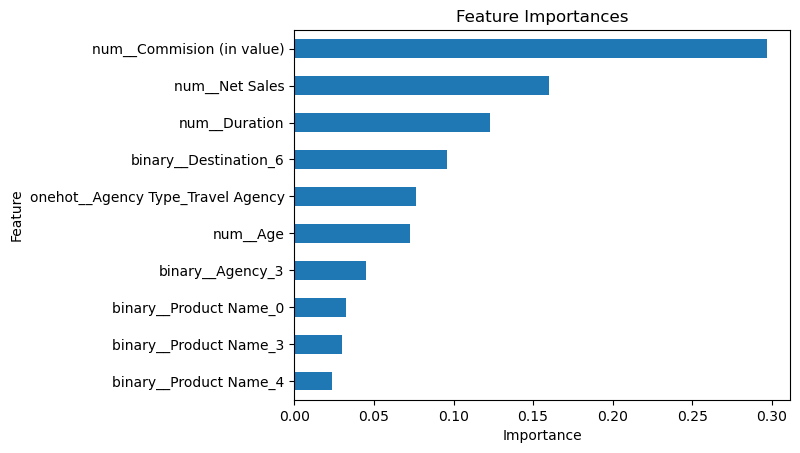

In [215]:
# Plot feature importances
best_model = gb_rus_grid.best_estimator_
feature_importances = best_model.named_steps['Model'].feature_importances_
feature_names = best_model.named_steps['PrePros'].get_feature_names_out()

# Create a pandas Series with feature importances and feature names
coef1 = pd.Series(feature_importances, index=feature_names).sort_values(ascending=False).head(10)

# Plot the top 10 feature importances
coef1.plot(kind='barh', title='Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.show()

Terlihat bahwa ternyata untuk model GradientBoosting with Random Under Sampling kita, fitur/kolom Commission adalah yang paling penting, kemudian diikuti dengan Net Sales, Duration, dan selanjutnya. Hasil ini konsisten dengan hipotesis kita diatas saat melakukan data analysis yang melihat bahwa claims% berbanding lurus dengan Commission, Net Sales, dan Duration. Secara logika pun, ini masuk akal karena kemungkinan claims seharusnya memang lebih tinggi untuk travel insurance yang harga-nya lebih mahal karena coverage-nya biasanya akan mencakup lebih luas sehingga probability claims akan meningkat, lalu mengingat juga commission harusnya juga berbanding lurus dengan harga travel insurance yang dijual. Panjangnya durasi perjalanan juga secara logis akan berdampak karena lebih lama durasi perjalanan seharusnya lebih tinggi probabilitas terjadi kejadian - kejadian yang tidak diinginkan traveller.

## Conclusion & Recommendation

In [192]:
# Define models
knn = KNeighborsClassifier(algorithm='auto',n_neighbors=9,weights='uniform')
models = [knn]

def y_pred_func(i):
    estimator=ImbPipeline([
        ('preprocess',prepros),
        ('resampling',rus),
        ('model',knn)])
    x_train,x_test
    
    estimator.fit(x_train,y_train)
    return(estimator,estimator.predict(x_test),x_test)


estimator,y_pred,x_test = y_pred_func(i)
y_predict_proba = estimator.predict_proba(x_test)[:,1]
print('Classification Report KNN with RUS Tuned : \n','\n', classification_report(y_test,y_pred))
cm = pd.crosstab(y_test,y_pred)
print('Confusion Matrix KNN with RUS Tuned : \n')
cm
    

Classification Report KNN with RUS Tuned : 
 
               precision    recall  f1-score   support

           0       0.99      0.75      0.85      8502
           1       0.04      0.72      0.08       134

    accuracy                           0.75      8636
   macro avg       0.52      0.74      0.47      8636
weighted avg       0.98      0.75      0.84      8636

Confusion Matrix KNN with RUS Tuned : 



col_0,0,1
Claim,,
0,6372,2130
1,37,97


Model terbaik menurut kami adalah KNN with RUS dengan parameter (algorithm='auto',n_neighbors=9,weights='uniform'), karena hasil recall untuk claim adalah paling tinggi. Kita perlu ingat bahwa recall adalah metric paling penting karena biaya false negative sangatlah besar ke perusahaan. Kita harus meminimalisir jumlah false negative, jumlah prediksi tidak claim tapi ternyata melakukan claim, karena ini merupakan negatively skewed tail risk yang bisa membuat perusahaan asuransi bangkrut biasanya.

Model memiliki precision yang sangat tinggi untuk klaim tidak dilakukan (claim = 0), artinya hampir semua prediksi tidak claim memang benar tidak claim. Recall 0 = 0.75 menunjukkan bahwa model kita berhasil mengidentifikasi 75% klaim yang sebenarnya tidak dilakukan. Precision untuk klaim dilakukan (claim = 1) sangat rendah (0.04), yang berarti banyak prediksi klaim dilakukan yang sebenarnya tidak dilakukan. Namun, recall yang tinggi (0.72) menunjukkan bahwa model mampu mendeteksi sebagian besar klaim yang dilakukan.

#### Model Implementation

Mari kita hitung kembali dampak biaya dengan asumsi biaya Tanpa Model (Rule of Thumb Travel Insurance) vs. Dengan Model:

`Tanpa Prediksi Model` 
* Kita menyiapkan claim Rp 10.000.000,- secara rata - rata untuk setiap pemegang polis, kita asumsi setiap polis yang ditulis akan dilakukan claim.
* Dampak Biaya: Uang yang disiapkan untuk claim = Rp10.000.000 x 8,636 = `Rp 86.360.000.000,-`

`Dengan Prediksi Model`:
* Kita menyiapkan claim Rp 10.000.000,- secara rata - rata untuk setiap pemegang polis yang diprediksikan oleh model akan melakukan claim
* Dampak Biaya: Uang yang disiapkan untuk claim = Rp10.000.000 x (2.130 + 97) = `Rp 22.270.000.000,-`

`Aktual`:
* Terjadi 134 jumlah claim yang dilakukan oleh pemilik asuransi secara aktual
* Dampak Biaya: Uang yang disiapkan untuk claim = Rp10.000.000 x 134 = `Rp 1.340.000.000,-`

Melalui penggunaaan model ini, kita bisa yakin bahwa uang yang kita siapkan untuk claims akan `selalu cukup dibandingkan total claims aktual` karena mengingat `false negative` yang kita `minimalisir` dalam pemilihan model.

Kurang lebih, perusahaan dapat mengurangi persediaan untuk claims sebesar `~75%` dengan menggunakan model ini. Uang insurance free float ini sebesar selisih Rp 64.090.000.000,- (dibandingkan tanpa model) untuk digunakan untuk keperluan lainnya, misalnya di diinvestasikan dalam instrumen fixed income yang yield-nya lebih besar.

#### Recommendation

#### Model Performance

Untuk meningkatkan performa model dan mengurangi false negatives, berikut adalah beberapa rekomendasi:

Penambahan/Perubahan Fitur:
* Menambahkan fitur-fitur baru yang mungkin berhubungan dengan klaim, seperti data demografis tambahan, riwayat klaim sebelumnya, dan informasi terkait polis asuransi yang lebih rinci.

Analisis Klaim yang Salah Diprediksi:
* Melakukan analisis lebih mendalam lagi terhadap klaim yang salah diprediksi oleh model untuk memahami pola dan karakteristik klaim tersebut. Hal ini dapat membantu dalam melakukan penyesuaian pada fitur atau model yang digunakan.

Dengan rekomendasi ini, diharapkan model dapat semakin akurat dan efisien dalam mengidentifikasi klaim asuransi perjalanan, sekaligus menghemat biaya operasional perusahaan. Implementasi model yang tepat akan memberikan keuntungan finansial yang signifikan dan meningkatkan kepuasan pelanggan.

#### Business Strategy

Untuk meminimalisir jumlah pemilik polis yang melakukan klaim:

* Fokus pada penjualan produk - produk yang basic atau value dan memiliki harga net penjualan yang rendah, karena berdasarkan analisa sebelumnya kebanyakan yang melakukan klaim itu adalah justru pembeli polis yang net sales-nya tinggi dikarenakan produk pembeliannya premium seperti platinum , gold atau silver coverage plan.
* Lalu, Fokuskan juga pada penjualan polis travel asuransi yang durasi perjalanan-nya itu lebih pendek, karena menurut analisa kami lebih tinggi durasi perjalanan, cenderung lebih tinggi juga claims%. Ini especially terlihat dalam feature importance diatas.